In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io
from datetime import datetime
from scipy import stats
from statsmodels import robust
%matplotlib inline

In [2]:
data1 = pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto74/paso_a_paso.csv?raw=true', sep=',')
data1.head()
#Primero se cargaron los datos del MinCiencia. Especificamente el Producto74 y el archivo paso_a_paso.
#Era necesario este archivo para poder tener las fases de cada comuna por región.

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,...,2021-09-27,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06
0,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,15,Arica y Parinacota,15101,Arica,Urbana,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
2,15,Arica y Parinacota,15102,Camarones,Total,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,15,Arica y Parinacota,15202,General Lagos,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
4,15,Arica y Parinacota,15201,Putre,Total,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [3]:
data2 = pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto1/Covid-19.csv?raw=true', sep=',')
data2.head()
#Tambien se carga el archivo de Covid_19.csv que nos entrega la población de cada comuna. El cual es un dato relevante para responder las preguntas a continuación

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2021-09-10,2021-09-13,2021-09-17,2021-09-20,2021-09-24,2021-09-27,2021-10-01,2021-10-04,2021-10-08,Tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,29763.0,29836.0,29929.0,30002.0,30128.0,30239.0,30376.0,30463.0,30536.0,12335.2
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,67.0,67.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,5677.2
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,10864.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,205.0,207.0,208.0,207.0,211.0,215.0,213.0,213.0,213.0,8469.2
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,158.0,163.0,161.0,163.0,165.0,165.0,167.0,170.0,175.0,NaN


In [4]:
data2 = data2[['Region', 'Codigo region', 'Comuna', 'Codigo comuna', 'Poblacion']]
data2 = data2.dropna()
data2['Codigo comuna'].astype(int)
data2.head()

#Aquí se eliminaron las columnas que no eran de importancia de la data2. 
#Se borran los datos que son nulos
#Se cambia el formato de Codigo Comuna a entero.


,Region,Codigo region,Comuna,Codigo comuna,Poblacion
0,Arica y Parinacota,15,Arica,15101.0,247552.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0
5,Tarapacá,1,Alto Hospicio,1107.0,129999.0


In [5]:
data1=data1.rename(columns={'codigo_comuna':'Codigo comuna'})
#Se cambia el nombre de la columna Codigo_comuna, para poder combinar los datos de ambos dataframes.

In [6]:
data = data1.merge(data2, on='Codigo comuna')
data.head()
#Aquí se combinaron los datos de ambos dataframes, utilizando el 'Codigo comuna' como dato en común.

,codigo_region,region_residencia,Codigo comuna,comuna_residencia,zona,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,...,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06,Region,Codigo region,Comuna,Poblacion
0,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,3,3,3,3,3,3,Arica y Parinacota,15,Arica,247552.0
1,15,Arica y Parinacota,15101,Arica,Urbana,1,1,1,1,1,...,3,3,3,3,3,3,Arica y Parinacota,15,Arica,247552.0
2,15,Arica y Parinacota,15102,Camarones,Total,3,3,3,3,3,...,3,3,3,3,3,3,Arica y Parinacota,15,Camarones,1233.0
3,15,Arica y Parinacota,15202,General Lagos,Total,3,3,3,3,3,...,4,4,4,4,4,4,Arica y Parinacota,15,General Lagos,810.0
4,15,Arica y Parinacota,15201,Putre,Total,3,3,3,3,3,...,3,3,3,3,3,3,Arica y Parinacota,15,Putre,2515.0


In [7]:
data = data.drop(['Region', 'Codigo region', 'Comuna'], axis=1)
data
#Se borraron las columnas que eran redundates y que no eran de utilidad para el desarrollo posterior.

,codigo_region,region_residencia,Codigo comuna,comuna_residencia,zona,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,...,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06,Poblacion
0,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,247552.0
1,15,Arica y Parinacota,15101,Arica,Urbana,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,247552.0
2,15,Arica y Parinacota,15102,Camarones,Total,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,1233.0
3,15,Arica y Parinacota,15202,General Lagos,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,810.0
4,15,Arica y Parinacota,15201,Putre,Total,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,2515.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,12,Magallanes,12101,Punta Arenas,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,5,141984.0
382,12,Magallanes,12103,Río Verde,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,5,211.0
383,12,Magallanes,12104,San Gregorio,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,5,681.0
384,12,Magallanes,12303,Timaukel,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,5,282.0


In [8]:
data = data.drop(data[data['zona']=='Rural'].index)
data
# Se borraron los datos de las filas que contenian una comuna declarada de tipo 'Rural', ya que tenian la misma población que zona 'Urbana' lo cual dificultaba el calculo posterior.

,codigo_region,region_residencia,Codigo comuna,comuna_residencia,zona,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,...,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06,Poblacion
1,15,Arica y Parinacota,15101,Arica,Urbana,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,247552.0
2,15,Arica y Parinacota,15102,Camarones,Total,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,1233.0
3,15,Arica y Parinacota,15202,General Lagos,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,810.0
4,15,Arica y Parinacota,15201,Putre,Total,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,2515.0
5,1,Tarapacá,1107,Alto Hospicio,Total,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,129999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,12,Magallanes,12101,Punta Arenas,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,5,141984.0
382,12,Magallanes,12103,Río Verde,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,5,211.0
383,12,Magallanes,12104,San Gregorio,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,5,681.0
384,12,Magallanes,12303,Timaukel,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,5,282.0


In [9]:
AYP = data.drop(['codigo_region', 'Codigo comuna', 'comuna_residencia','zona'], axis=1)
AYP
#Aquí se borraron finalmente, todas las columnas que no son de importancia para la elaboración de los gráficos.

,region_residencia,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05,...,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06,Poblacion
1,Arica y Parinacota,1,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,247552.0
2,Arica y Parinacota,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,1233.0
3,Arica y Parinacota,3,3,3,3,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,810.0
4,Arica y Parinacota,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,2515.0
5,Tarapacá,1,1,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,129999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,Magallanes,3,3,3,3,3,3,3,3,3,...,4,4,4,4,4,4,4,4,5,141984.0
382,Magallanes,3,3,3,3,3,3,3,3,3,...,4,4,4,4,4,4,4,4,5,211.0
383,Magallanes,3,3,3,3,3,3,3,3,3,...,4,4,4,4,4,4,4,4,5,681.0
384,Magallanes,3,3,3,3,3,3,3,3,3,...,4,4,4,4,4,4,4,4,5,282.0


In [10]:
#    Con el siguiente código, se busca que cuando una comuna esta en cuarentena (es decir tiene valor 1) entonces,
#    se cambia el valor 1 por el número de habitantes correspondiente a esa comuna.
#    De esta forma, se puede obtener el número de personas en cuarentena por cada región.


#    Este código, claramente no es el ideal, ya que implica mucho trabajo de escribir,
#    pero la verdad no encontre otro metodo para poder hacer lo descrito recién. Buscar una forma de hacerlo fue lo que mas tiempo me llevó.



AYP.loc[AYP['2020-07-28'] == 1, '2020-07-28'] = AYP['Poblacion']
AYP.loc[AYP['2020-07-28'] == 2, '2020-07-28'] = 0
AYP.loc[AYP['2020-07-28'] == 3, '2020-07-28'] = 0
AYP.loc[AYP['2020-07-28'] == 4, '2020-07-28'] = 0
AYP.loc[AYP['2020-07-29'] == 1, '2020-07-29'] = AYP['Poblacion']
AYP.loc[AYP['2020-07-29'] == 2, '2020-07-29'] = 0
AYP.loc[AYP['2020-07-29'] == 3, '2020-07-29'] = 0
AYP.loc[AYP['2020-07-29'] == 4, '2020-07-29'] = 0
AYP.loc[AYP['2020-07-30'] == 1, '2020-07-30'] = AYP['Poblacion']
AYP.loc[AYP['2020-07-30'] == 2, '2020-07-30'] = 0
AYP.loc[AYP['2020-07-30'] == 3, '2020-07-30'] = 0
AYP.loc[AYP['2020-07-30'] == 4, '2020-07-30'] = 0
AYP.loc[AYP['2020-07-31'] == 1, '2020-07-31'] = AYP['Poblacion']
AYP.loc[AYP['2020-07-31'] == 2, '2020-07-31'] = 0
AYP.loc[AYP['2020-07-31'] == 3, '2020-07-31'] = 0
AYP.loc[AYP['2020-08-31'] == 4, '2020-08-31'] = 0
AYP.loc[AYP['2020-08-01'] == 1, '2020-08-01'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-01'] == 2, '2020-08-01'] = 0
AYP.loc[AYP['2020-08-01'] == 3, '2020-08-01'] = 0
AYP.loc[AYP['2020-08-01'] == 4, '2020-08-01'] = 0
AYP.loc[AYP['2020-08-02'] == 1, '2020-08-02'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-02'] == 2, '2020-08-02'] = 0
AYP.loc[AYP['2020-08-02'] == 3, '2020-08-02'] = 0
AYP.loc[AYP['2020-08-02'] == 4, '2020-08-02'] = 0
AYP.loc[AYP['2020-08-03'] == 1, '2020-08-03'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-03'] == 2, '2020-08-03'] = 0
AYP.loc[AYP['2020-08-03'] == 3, '2020-08-03'] = 0
AYP.loc[AYP['2020-08-03'] == 4, '2020-08-03'] = 0
AYP.loc[AYP['2020-08-04'] == 1, '2020-08-04'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-04'] == 2, '2020-08-04'] = 0
AYP.loc[AYP['2020-08-04'] == 3, '2020-08-04'] = 0
AYP.loc[AYP['2020-08-04'] == 4, '2020-08-04'] = 0
AYP.loc[AYP['2020-08-05'] == 1, '2020-08-05'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-05'] == 2, '2020-08-05'] = 0
AYP.loc[AYP['2020-08-05'] == 3, '2020-08-05'] = 0
AYP.loc[AYP['2020-08-05'] == 4, '2020-08-05'] = 0
AYP.loc[AYP['2020-08-06'] == 1, '2020-08-06'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-06'] == 2, '2020-08-06'] = 0
AYP.loc[AYP['2020-08-06'] == 3, '2020-08-06'] = 0
AYP.loc[AYP['2020-08-06'] == 4, '2020-08-06'] = 0
AYP.loc[AYP['2020-08-07'] == 1, '2020-08-07'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-07'] == 2, '2020-08-07'] = 0
AYP.loc[AYP['2020-08-07'] == 3, '2020-08-07'] = 0
AYP.loc[AYP['2020-08-07'] == 4, '2020-08-07'] = 0
AYP.loc[AYP['2020-08-08'] == 1, '2020-08-08'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-08'] == 2, '2020-08-08'] = 0
AYP.loc[AYP['2020-08-08'] == 3, '2020-08-08'] = 0
AYP.loc[AYP['2020-08-08'] == 4, '2020-08-08'] = 0
AYP.loc[AYP['2020-08-09'] == 1, '2020-08-09'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-09'] == 2, '2020-08-09'] = 0
AYP.loc[AYP['2020-08-09'] == 3, '2020-08-09'] = 0
AYP.loc[AYP['2020-08-09'] == 4, '2020-08-09'] = 0
AYP.loc[AYP['2020-08-10'] == 1, '2020-08-10'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-10'] == 2, '2020-08-10'] = 0
AYP.loc[AYP['2020-08-10'] == 3, '2020-08-10'] = 0
AYP.loc[AYP['2020-08-10'] == 4, '2020-08-10'] = 0
AYP.loc[AYP['2020-08-11'] == 1, '2020-08-11'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-11'] == 2, '2020-08-11'] = 0
AYP.loc[AYP['2020-08-11'] == 3, '2020-08-11'] = 0
AYP.loc[AYP['2020-08-11'] == 4, '2020-08-11'] = 0
AYP.loc[AYP['2020-08-12'] == 1, '2020-08-12'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-12'] == 2, '2020-08-12'] = 0
AYP.loc[AYP['2020-08-12'] == 3, '2020-08-12'] = 0
AYP.loc[AYP['2020-08-12'] == 4, '2020-08-12'] = 0
AYP.loc[AYP['2020-08-13'] == 1, '2020-08-13'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-13'] == 2, '2020-08-13'] = 0
AYP.loc[AYP['2020-08-13'] == 3, '2020-08-13'] = 0
AYP.loc[AYP['2020-08-13'] == 4, '2020-08-13'] = 0
AYP.loc[AYP['2020-08-14'] == 1, '2020-08-14'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-14'] == 2, '2020-08-14'] = 0
AYP.loc[AYP['2020-08-14'] == 3, '2020-08-14'] = 0
AYP.loc[AYP['2020-08-14'] == 4, '2020-08-14'] = 0
AYP.loc[AYP['2020-08-15'] == 1, '2020-08-15'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-15'] == 2, '2020-08-15'] = 0
AYP.loc[AYP['2020-08-15'] == 3, '2020-08-15'] = 0
AYP.loc[AYP['2020-08-15'] == 4, '2020-08-15'] = 0
AYP.loc[AYP['2020-08-16'] == 1, '2020-08-16'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-16'] == 2, '2020-08-16'] = 0
AYP.loc[AYP['2020-08-16'] == 3, '2020-08-16'] = 0
AYP.loc[AYP['2020-08-16'] == 4, '2020-08-16'] = 0
AYP.loc[AYP['2020-08-17'] == 1, '2020-08-17'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-17'] == 2, '2020-08-17'] = 0
AYP.loc[AYP['2020-08-17'] == 3, '2020-08-17'] = 0
AYP.loc[AYP['2020-08-17'] == 4, '2020-08-17'] = 0
AYP.loc[AYP['2020-08-18'] == 1, '2020-08-18'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-18'] == 2, '2020-08-18'] = 0
AYP.loc[AYP['2020-08-18'] == 3, '2020-08-18'] = 0
AYP.loc[AYP['2020-08-18'] == 4, '2020-08-18'] = 0
AYP.loc[AYP['2020-08-19'] == 1, '2020-08-19'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-19'] == 2, '2020-08-19'] = 0
AYP.loc[AYP['2020-08-19'] == 3, '2020-08-19'] = 0
AYP.loc[AYP['2020-08-19'] == 4, '2020-08-19'] = 0
AYP.loc[AYP['2020-08-20'] == 1, '2020-08-20'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-20'] == 2, '2020-08-20'] = 0
AYP.loc[AYP['2020-08-20'] == 3, '2020-08-20'] = 0
AYP.loc[AYP['2020-08-20'] == 4, '2020-08-20'] = 0
AYP.loc[AYP['2020-08-21'] == 1, '2020-08-21'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-21'] == 2, '2020-08-21'] = 0
AYP.loc[AYP['2020-08-21'] == 3, '2020-08-21'] = 0
AYP.loc[AYP['2020-08-21'] == 4, '2020-08-21'] = 0
AYP.loc[AYP['2020-08-22'] == 1, '2020-08-22'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-22'] == 2, '2020-08-22'] = 0
AYP.loc[AYP['2020-08-22'] == 3, '2020-08-22'] = 0
AYP.loc[AYP['2020-08-22'] == 4, '2020-08-22'] = 0
AYP.loc[AYP['2020-08-23'] == 1, '2020-08-23'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-23'] == 2, '2020-08-23'] = 0
AYP.loc[AYP['2020-08-23'] == 3, '2020-08-23'] = 0
AYP.loc[AYP['2020-08-23'] == 4, '2020-08-23'] = 0
AYP.loc[AYP['2020-08-24'] == 1, '2020-08-24'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-24'] == 2, '2020-08-24'] = 0
AYP.loc[AYP['2020-08-24'] == 3, '2020-08-24'] = 0
AYP.loc[AYP['2020-08-24'] == 4, '2020-08-24'] = 0
AYP.loc[AYP['2020-08-25'] == 1, '2020-08-25'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-25'] == 2, '2020-08-25'] = 0
AYP.loc[AYP['2020-08-25'] == 3, '2020-08-25'] = 0
AYP.loc[AYP['2020-08-25'] == 4, '2020-08-25'] = 0
AYP.loc[AYP['2020-08-26'] == 1, '2020-08-26'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-26'] == 2, '2020-08-26'] = 0
AYP.loc[AYP['2020-08-26'] == 3, '2020-08-26'] = 0
AYP.loc[AYP['2020-08-26'] == 4, '2020-08-26'] = 0
AYP.loc[AYP['2020-08-27'] == 1, '2020-08-27'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-27'] == 2, '2020-08-27'] = 0
AYP.loc[AYP['2020-08-27'] == 3, '2020-08-27'] = 0
AYP.loc[AYP['2020-08-27'] == 4, '2020-08-27'] = 0
AYP.loc[AYP['2020-08-28'] == 1, '2020-08-28'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-28'] == 2, '2020-08-28'] = 0
AYP.loc[AYP['2020-08-28'] == 3, '2020-08-28'] = 0
AYP.loc[AYP['2020-08-28'] == 4, '2020-08-28'] = 0
AYP.loc[AYP['2020-08-29'] == 1, '2020-08-29'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-29'] == 2, '2020-08-29'] = 0
AYP.loc[AYP['2020-08-29'] == 3, '2020-08-29'] = 0
AYP.loc[AYP['2020-08-29'] == 4, '2020-08-29'] = 0
AYP.loc[AYP['2020-08-30'] == 1, '2020-08-30'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-30'] == 2, '2020-08-30'] = 0
AYP.loc[AYP['2020-08-30'] == 3, '2020-08-30'] = 0
AYP.loc[AYP['2020-08-30'] == 4, '2020-08-30'] = 0
AYP.loc[AYP['2020-08-31'] == 1, '2020-08-31'] = AYP['Poblacion']
AYP.loc[AYP['2020-08-31'] == 2, '2020-08-31'] = 0
AYP.loc[AYP['2020-08-31'] == 3, '2020-08-31'] = 0
AYP.loc[AYP['2020-08-31'] == 4, '2020-08-31'] = 0



AYP.loc[AYP['2020-09-01'] == 1, '2020-09-01'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-01'] == 2, '2020-09-01'] = 0
AYP.loc[AYP['2020-09-01'] == 3, '2020-09-01'] = 0
AYP.loc[AYP['2020-09-01'] == 4, '2020-09-01'] = 0
AYP.loc[AYP['2020-09-02'] == 1, '2020-09-02'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-02'] == 2, '2020-09-02'] = 0
AYP.loc[AYP['2020-09-02'] == 3, '2020-09-02'] = 0
AYP.loc[AYP['2020-09-02'] == 4, '2020-09-02'] = 0
AYP.loc[AYP['2020-09-03'] == 1, '2020-09-03'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-03'] == 2, '2020-09-03'] = 0
AYP.loc[AYP['2020-09-03'] == 3, '2020-09-03'] = 0
AYP.loc[AYP['2020-09-03'] == 4, '2020-09-03'] = 0
AYP.loc[AYP['2020-09-04'] == 1, '2020-09-04'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-04'] == 2, '2020-09-04'] = 0
AYP.loc[AYP['2020-09-04'] == 3, '2020-09-04'] = 0
AYP.loc[AYP['2020-09-04'] == 4, '2020-09-04'] = 0
AYP.loc[AYP['2020-09-05'] == 1, '2020-09-05'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-05'] == 2, '2020-09-05'] = 0
AYP.loc[AYP['2020-09-05'] == 3, '2020-09-05'] = 0
AYP.loc[AYP['2020-09-05'] == 4, '2020-09-05'] = 0
AYP.loc[AYP['2020-09-06'] == 1, '2020-09-06'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-06'] == 2, '2020-09-06'] = 0
AYP.loc[AYP['2020-09-06'] == 3, '2020-09-06'] = 0
AYP.loc[AYP['2020-09-06'] == 4, '2020-09-06'] = 0
AYP.loc[AYP['2020-09-07'] == 1, '2020-09-07'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-07'] == 2, '2020-09-07'] = 0
AYP.loc[AYP['2020-09-07'] == 3, '2020-09-07'] = 0
AYP.loc[AYP['2020-09-07'] == 4, '2020-09-07'] = 0
AYP.loc[AYP['2020-09-08'] == 1, '2020-09-08'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-08'] == 2, '2020-09-08'] = 0
AYP.loc[AYP['2020-09-08'] == 3, '2020-09-08'] = 0
AYP.loc[AYP['2020-09-08'] == 4, '2020-09-08'] = 0
AYP.loc[AYP['2020-09-09'] == 1, '2020-09-09'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-09'] == 2, '2020-09-09'] = 0
AYP.loc[AYP['2020-09-09'] == 3, '2020-09-09'] = 0
AYP.loc[AYP['2020-09-09'] == 4, '2020-09-09'] = 0
AYP.loc[AYP['2020-09-10'] == 1, '2020-09-10'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-10'] == 2, '2020-09-10'] = 0
AYP.loc[AYP['2020-09-10'] == 3, '2020-09-10'] = 0
AYP.loc[AYP['2020-09-10'] == 4, '2020-09-10'] = 0
AYP.loc[AYP['2020-09-11'] == 1, '2020-09-11'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-11'] == 2, '2020-09-11'] = 0
AYP.loc[AYP['2020-09-11'] == 3, '2020-09-11'] = 0
AYP.loc[AYP['2020-09-11'] == 4, '2020-09-11'] = 0
AYP.loc[AYP['2020-09-12'] == 1, '2020-09-12'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-12'] == 2, '2020-09-12'] = 0
AYP.loc[AYP['2020-09-12'] == 3, '2020-09-12'] = 0
AYP.loc[AYP['2020-09-12'] == 4, '2020-09-12'] = 0
AYP.loc[AYP['2020-09-13'] == 1, '2020-09-13'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-13'] == 2, '2020-09-13'] = 0
AYP.loc[AYP['2020-09-13'] == 3, '2020-09-13'] = 0
AYP.loc[AYP['2020-09-13'] == 4, '2020-09-13'] = 0
AYP.loc[AYP['2020-09-14'] == 1, '2020-09-14'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-14'] == 2, '2020-09-14'] = 0
AYP.loc[AYP['2020-09-14'] == 3, '2020-09-14'] = 0
AYP.loc[AYP['2020-09-14'] == 4, '2020-09-14'] = 0
AYP.loc[AYP['2020-09-15'] == 1, '2020-09-15'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-15'] == 2, '2020-09-15'] = 0
AYP.loc[AYP['2020-09-15'] == 3, '2020-09-15'] = 0
AYP.loc[AYP['2020-09-15'] == 4, '2020-09-15'] = 0
AYP.loc[AYP['2020-09-16'] == 1, '2020-09-16'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-16'] == 2, '2020-09-16'] = 0
AYP.loc[AYP['2020-09-16'] == 3, '2020-09-16'] = 0
AYP.loc[AYP['2020-09-16'] == 4, '2020-09-16'] = 0
AYP.loc[AYP['2020-09-17'] == 1, '2020-09-17'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-17'] == 2, '2020-09-17'] = 0
AYP.loc[AYP['2020-09-17'] == 3, '2020-09-17'] = 0
AYP.loc[AYP['2020-09-17'] == 4, '2020-09-17'] = 0
AYP.loc[AYP['2020-09-18'] == 1, '2020-09-18'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-18'] == 2, '2020-09-18'] = 0
AYP.loc[AYP['2020-09-18'] == 3, '2020-09-18'] = 0
AYP.loc[AYP['2020-09-18'] == 4, '2020-09-18'] = 0
AYP.loc[AYP['2020-09-19'] == 1, '2020-09-19'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-19'] == 2, '2020-09-19'] = 0
AYP.loc[AYP['2020-09-19'] == 3, '2020-09-19'] = 0
AYP.loc[AYP['2020-09-19'] == 4, '2020-09-19'] = 0
AYP.loc[AYP['2020-09-20'] == 1, '2020-09-20'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-20'] == 2, '2020-09-20'] = 0
AYP.loc[AYP['2020-09-20'] == 3, '2020-09-20'] = 0
AYP.loc[AYP['2020-09-20'] == 4, '2020-09-20'] = 0
AYP.loc[AYP['2020-09-21'] == 1, '2020-09-21'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-21'] == 2, '2020-09-21'] = 0
AYP.loc[AYP['2020-09-21'] == 3, '2020-09-21'] = 0
AYP.loc[AYP['2020-09-21'] == 4, '2020-09-21'] = 0
AYP.loc[AYP['2020-09-22'] == 1, '2020-09-22'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-22'] == 2, '2020-09-22'] = 0
AYP.loc[AYP['2020-09-22'] == 3, '2020-09-22'] = 0
AYP.loc[AYP['2020-09-22'] == 4, '2020-09-22'] = 0
AYP.loc[AYP['2020-09-23'] == 1, '2020-09-23'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-23'] == 2, '2020-09-23'] = 0
AYP.loc[AYP['2020-09-23'] == 3, '2020-09-23'] = 0
AYP.loc[AYP['2020-09-23'] == 4, '2020-09-23'] = 0
AYP.loc[AYP['2020-09-24'] == 1, '2020-09-24'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-24'] == 2, '2020-09-24'] = 0
AYP.loc[AYP['2020-09-24'] == 3, '2020-09-24'] = 0
AYP.loc[AYP['2020-09-24'] == 4, '2020-09-24'] = 0
AYP.loc[AYP['2020-09-25'] == 1, '2020-09-25'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-25'] == 2, '2020-09-25'] = 0
AYP.loc[AYP['2020-09-25'] == 3, '2020-09-25'] = 0
AYP.loc[AYP['2020-09-25'] == 4, '2020-09-25'] = 0
AYP.loc[AYP['2020-09-26'] == 1, '2020-09-26'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-26'] == 2, '2020-09-26'] = 0
AYP.loc[AYP['2020-09-26'] == 3, '2020-09-26'] = 0
AYP.loc[AYP['2020-09-26'] == 4, '2020-09-26'] = 0
AYP.loc[AYP['2020-09-27'] == 1, '2020-09-27'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-27'] == 2, '2020-09-27'] = 0
AYP.loc[AYP['2020-09-27'] == 3, '2020-09-27'] = 0
AYP.loc[AYP['2020-09-27'] == 4, '2020-09-27'] = 0
AYP.loc[AYP['2020-09-28'] == 1, '2020-09-28'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-28'] == 2, '2020-09-28'] = 0
AYP.loc[AYP['2020-09-28'] == 3, '2020-09-28'] = 0
AYP.loc[AYP['2020-09-28'] == 4, '2020-09-28'] = 0
AYP.loc[AYP['2020-09-29'] == 1, '2020-09-29'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-29'] == 2, '2020-09-29'] = 0
AYP.loc[AYP['2020-09-29'] == 3, '2020-09-29'] = 0
AYP.loc[AYP['2020-09-29'] == 4, '2020-09-29'] = 0
AYP.loc[AYP['2020-09-30'] == 1, '2020-09-30'] = AYP['Poblacion']
AYP.loc[AYP['2020-09-30'] == 2, '2020-09-30'] = 0
AYP.loc[AYP['2020-09-30'] == 3, '2020-09-30'] = 0
AYP.loc[AYP['2020-09-30'] == 4, '2020-09-30'] = 0



AYP.loc[AYP['2020-10-01'] == 1, '2020-10-01'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-01'] == 2, '2020-10-01'] = 0
AYP.loc[AYP['2020-10-01'] == 3, '2020-10-01'] = 0
AYP.loc[AYP['2020-10-01'] == 4, '2020-10-01'] = 0
AYP.loc[AYP['2020-10-02'] == 1, '2020-10-02'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-02'] == 2, '2020-10-02'] = 0
AYP.loc[AYP['2020-10-02'] == 3, '2020-10-02'] = 0
AYP.loc[AYP['2020-10-02'] == 4, '2020-10-02'] = 0
AYP.loc[AYP['2020-10-03'] == 1, '2020-10-03'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-03'] == 2, '2020-10-03'] = 0
AYP.loc[AYP['2020-10-03'] == 3, '2020-10-03'] = 0
AYP.loc[AYP['2020-10-03'] == 4, '2020-10-03'] = 0
AYP.loc[AYP['2020-10-04'] == 1, '2020-10-04'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-04'] == 2, '2020-10-04'] = 0
AYP.loc[AYP['2020-10-04'] == 3, '2020-10-04'] = 0
AYP.loc[AYP['2020-10-04'] == 4, '2020-10-04'] = 0
AYP.loc[AYP['2020-10-05'] == 1, '2020-10-05'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-05'] == 2, '2020-10-05'] = 0
AYP.loc[AYP['2020-10-05'] == 3, '2020-10-05'] = 0
AYP.loc[AYP['2020-10-05'] == 4, '2020-10-05'] = 0
AYP.loc[AYP['2020-10-06'] == 1, '2020-10-06'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-06'] == 2, '2020-10-06'] = 0
AYP.loc[AYP['2020-10-06'] == 3, '2020-10-06'] = 0
AYP.loc[AYP['2020-10-06'] == 4, '2020-10-06'] = 0
AYP.loc[AYP['2020-10-07'] == 1, '2020-10-07'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-07'] == 2, '2020-10-07'] = 0
AYP.loc[AYP['2020-10-07'] == 3, '2020-10-07'] = 0
AYP.loc[AYP['2020-10-07'] == 4, '2020-10-07'] = 0
AYP.loc[AYP['2020-10-08'] == 1, '2020-10-08'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-08'] == 2, '2020-10-08'] = 0
AYP.loc[AYP['2020-10-08'] == 3, '2020-10-08'] = 0
AYP.loc[AYP['2020-10-08'] == 4, '2020-10-08'] = 0
AYP.loc[AYP['2020-10-09'] == 1, '2020-10-09'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-09'] == 2, '2020-10-09'] = 0
AYP.loc[AYP['2020-10-09'] == 3, '2020-10-09'] = 0
AYP.loc[AYP['2020-10-09'] == 4, '2020-10-09'] = 0
AYP.loc[AYP['2020-10-10'] == 1, '2020-10-10'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-10'] == 2, '2020-10-10'] = 0
AYP.loc[AYP['2020-10-10'] == 3, '2020-10-10'] = 0
AYP.loc[AYP['2020-10-10'] == 4, '2020-10-10'] = 0
AYP.loc[AYP['2020-10-11'] == 1, '2020-10-11'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-11'] == 2, '2020-10-11'] = 0
AYP.loc[AYP['2020-10-11'] == 3, '2020-10-11'] = 0
AYP.loc[AYP['2020-10-11'] == 4, '2020-10-11'] = 0
AYP.loc[AYP['2020-10-12'] == 1, '2020-10-12'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-12'] == 2, '2020-10-12'] = 0
AYP.loc[AYP['2020-10-12'] == 3, '2020-10-12'] = 0
AYP.loc[AYP['2020-10-12'] == 4, '2020-10-12'] = 0
AYP.loc[AYP['2020-10-13'] == 1, '2020-10-13'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-13'] == 2, '2020-10-13'] = 0
AYP.loc[AYP['2020-10-13'] == 3, '2020-10-13'] = 0
AYP.loc[AYP['2020-10-13'] == 4, '2020-10-13'] = 0
AYP.loc[AYP['2020-10-14'] == 1, '2020-10-14'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-14'] == 2, '2020-10-14'] = 0
AYP.loc[AYP['2020-10-14'] == 3, '2020-10-14'] = 0
AYP.loc[AYP['2020-10-14'] == 4, '2020-10-14'] = 0
AYP.loc[AYP['2020-10-15'] == 1, '2020-10-15'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-15'] == 2, '2020-10-15'] = 0
AYP.loc[AYP['2020-10-15'] == 3, '2020-10-15'] = 0
AYP.loc[AYP['2020-10-15'] == 4, '2020-10-15'] = 0
AYP.loc[AYP['2020-10-16'] == 1, '2020-10-16'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-16'] == 2, '2020-10-16'] = 0
AYP.loc[AYP['2020-10-16'] == 3, '2020-10-16'] = 0
AYP.loc[AYP['2020-10-16'] == 4, '2020-10-16'] = 0
AYP.loc[AYP['2020-10-17'] == 1, '2020-10-17'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-17'] == 2, '2020-10-17'] = 0
AYP.loc[AYP['2020-10-17'] == 3, '2020-10-17'] = 0
AYP.loc[AYP['2020-10-17'] == 4, '2020-10-17'] = 0
AYP.loc[AYP['2020-10-18'] == 1, '2020-10-18'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-18'] == 2, '2020-10-18'] = 0
AYP.loc[AYP['2020-10-18'] == 3, '2020-10-18'] = 0
AYP.loc[AYP['2020-10-18'] == 4, '2020-10-18'] = 0
AYP.loc[AYP['2020-10-19'] == 1, '2020-10-19'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-19'] == 2, '2020-10-19'] = 0
AYP.loc[AYP['2020-10-19'] == 3, '2020-10-19'] = 0
AYP.loc[AYP['2020-10-19'] == 4, '2020-10-19'] = 0
AYP.loc[AYP['2020-10-20'] == 1, '2020-10-20'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-20'] == 2, '2020-10-20'] = 0
AYP.loc[AYP['2020-10-20'] == 3, '2020-10-20'] = 0
AYP.loc[AYP['2020-10-20'] == 4, '2020-10-20'] = 0
AYP.loc[AYP['2020-10-21'] == 1, '2020-10-21'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-21'] == 2, '2020-10-21'] = 0
AYP.loc[AYP['2020-10-21'] == 3, '2020-10-21'] = 0
AYP.loc[AYP['2020-10-21'] == 4, '2020-10-21'] = 0
AYP.loc[AYP['2020-10-22'] == 1, '2020-10-22'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-22'] == 2, '2020-10-22'] = 0
AYP.loc[AYP['2020-10-22'] == 3, '2020-10-22'] = 0
AYP.loc[AYP['2020-10-22'] == 4, '2020-10-22'] = 0
AYP.loc[AYP['2020-10-23'] == 1, '2020-10-23'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-23'] == 2, '2020-10-23'] = 0
AYP.loc[AYP['2020-10-23'] == 3, '2020-10-23'] = 0
AYP.loc[AYP['2020-10-23'] == 4, '2020-10-23'] = 0
AYP.loc[AYP['2020-10-24'] == 1, '2020-10-24'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-24'] == 2, '2020-10-24'] = 0
AYP.loc[AYP['2020-10-24'] == 3, '2020-10-24'] = 0
AYP.loc[AYP['2020-10-24'] == 4, '2020-10-24'] = 0
AYP.loc[AYP['2020-10-25'] == 1, '2020-10-25'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-25'] == 2, '2020-10-25'] = 0
AYP.loc[AYP['2020-10-25'] == 3, '2020-10-25'] = 0
AYP.loc[AYP['2020-10-25'] == 4, '2020-10-25'] = 0
AYP.loc[AYP['2020-10-26'] == 1, '2020-10-26'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-26'] == 2, '2020-10-26'] = 0
AYP.loc[AYP['2020-10-26'] == 3, '2020-10-26'] = 0
AYP.loc[AYP['2020-10-26'] == 4, '2020-10-26'] = 0
AYP.loc[AYP['2020-10-27'] == 1, '2020-10-27'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-27'] == 2, '2020-10-27'] = 0
AYP.loc[AYP['2020-10-27'] == 3, '2020-10-27'] = 0
AYP.loc[AYP['2020-10-27'] == 4, '2020-10-27'] = 0
AYP.loc[AYP['2020-10-28'] == 1, '2020-10-28'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-28'] == 2, '2020-10-28'] = 0
AYP.loc[AYP['2020-10-28'] == 3, '2020-10-28'] = 0
AYP.loc[AYP['2020-10-28'] == 4, '2020-10-28'] = 0
AYP.loc[AYP['2020-10-29'] == 1, '2020-10-29'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-29'] == 2, '2020-10-29'] = 0
AYP.loc[AYP['2020-10-29'] == 3, '2020-10-29'] = 0
AYP.loc[AYP['2020-10-29'] == 4, '2020-10-29'] = 0
AYP.loc[AYP['2020-10-30'] == 1, '2020-10-30'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-30'] == 2, '2020-10-30'] = 0
AYP.loc[AYP['2020-10-30'] == 3, '2020-10-30'] = 0
AYP.loc[AYP['2020-10-30'] == 4, '2020-10-30'] = 0
AYP.loc[AYP['2020-10-31'] == 1, '2020-10-31'] = AYP['Poblacion']
AYP.loc[AYP['2020-10-31'] == 2, '2020-10-31'] = 0
AYP.loc[AYP['2020-10-31'] == 3, '2020-10-31'] = 0
AYP.loc[AYP['2020-10-31'] == 4, '2020-10-31'] = 0



AYP.loc[AYP['2020-11-01'] == 1, '2020-11-01'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-01'] == 2, '2020-11-01'] = 0
AYP.loc[AYP['2020-11-01'] == 3, '2020-11-01'] = 0
AYP.loc[AYP['2020-11-01'] == 4, '2020-11-01'] = 0
AYP.loc[AYP['2020-11-02'] == 1, '2020-11-02'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-02'] == 2, '2020-11-02'] = 0
AYP.loc[AYP['2020-11-02'] == 3, '2020-11-02'] = 0
AYP.loc[AYP['2020-11-02'] == 4, '2020-11-02'] = 0
AYP.loc[AYP['2020-11-03'] == 1, '2020-11-03'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-03'] == 2, '2020-11-03'] = 0
AYP.loc[AYP['2020-11-03'] == 3, '2020-11-03'] = 0
AYP.loc[AYP['2020-11-03'] == 4, '2020-11-03'] = 0
AYP.loc[AYP['2020-11-04'] == 1, '2020-11-04'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-04'] == 2, '2020-11-04'] = 0
AYP.loc[AYP['2020-11-04'] == 3, '2020-11-04'] = 0
AYP.loc[AYP['2020-11-04'] == 4, '2020-11-04'] = 0
AYP.loc[AYP['2020-11-05'] == 1, '2020-11-05'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-05'] == 2, '2020-11-05'] = 0
AYP.loc[AYP['2020-11-05'] == 3, '2020-11-05'] = 0
AYP.loc[AYP['2020-11-05'] == 4, '2020-11-05'] = 0
AYP.loc[AYP['2020-11-06'] == 1, '2020-11-06'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-06'] == 2, '2020-11-06'] = 0
AYP.loc[AYP['2020-11-06'] == 3, '2020-11-06'] = 0
AYP.loc[AYP['2020-11-06'] == 4, '2020-11-06'] = 0
AYP.loc[AYP['2020-11-07'] == 1, '2020-11-07'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-07'] == 2, '2020-11-07'] = 0
AYP.loc[AYP['2020-11-07'] == 3, '2020-11-07'] = 0
AYP.loc[AYP['2020-11-07'] == 4, '2020-11-07'] = 0
AYP.loc[AYP['2020-11-08'] == 1, '2020-11-08'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-08'] == 2, '2020-11-08'] = 0
AYP.loc[AYP['2020-11-08'] == 3, '2020-11-08'] = 0
AYP.loc[AYP['2020-11-08'] == 4, '2020-11-08'] = 0
AYP.loc[AYP['2020-11-09'] == 1, '2020-11-09'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-09'] == 2, '2020-11-09'] = 0
AYP.loc[AYP['2020-11-09'] == 3, '2020-11-09'] = 0
AYP.loc[AYP['2020-11-09'] == 4, '2020-11-09'] = 0
AYP.loc[AYP['2020-11-10'] == 1, '2020-11-10'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-10'] == 2, '2020-11-10'] = 0
AYP.loc[AYP['2020-11-10'] == 3, '2020-11-10'] = 0
AYP.loc[AYP['2020-11-10'] == 4, '2020-11-10'] = 0
AYP.loc[AYP['2020-11-11'] == 1, '2020-11-11'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-11'] == 2, '2020-11-11'] = 0
AYP.loc[AYP['2020-11-11'] == 3, '2020-11-11'] = 0
AYP.loc[AYP['2020-11-11'] == 4, '2020-11-11'] = 0
AYP.loc[AYP['2020-11-12'] == 1, '2020-11-12'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-12'] == 2, '2020-11-12'] = 0
AYP.loc[AYP['2020-11-12'] == 3, '2020-11-12'] = 0
AYP.loc[AYP['2020-11-12'] == 4, '2020-11-12'] = 0
AYP.loc[AYP['2020-11-13'] == 1, '2020-11-13'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-13'] == 2, '2020-11-13'] = 0
AYP.loc[AYP['2020-11-13'] == 3, '2020-11-13'] = 0
AYP.loc[AYP['2020-11-13'] == 4, '2020-11-13'] = 0
AYP.loc[AYP['2020-11-14'] == 1, '2020-11-14'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-14'] == 2, '2020-11-14'] = 0
AYP.loc[AYP['2020-11-14'] == 3, '2020-11-14'] = 0
AYP.loc[AYP['2020-11-14'] == 4, '2020-11-14'] = 0
AYP.loc[AYP['2020-11-15'] == 1, '2020-11-15'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-15'] == 2, '2020-11-15'] = 0
AYP.loc[AYP['2020-11-15'] == 3, '2020-11-15'] = 0
AYP.loc[AYP['2020-11-15'] == 4, '2020-11-15'] = 0
AYP.loc[AYP['2020-11-16'] == 1, '2020-11-16'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-16'] == 2, '2020-11-16'] = 0
AYP.loc[AYP['2020-11-16'] == 3, '2020-11-16'] = 0
AYP.loc[AYP['2020-11-16'] == 4, '2020-11-16'] = 0
AYP.loc[AYP['2020-11-17'] == 1, '2020-11-17'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-17'] == 2, '2020-11-17'] = 0
AYP.loc[AYP['2020-11-17'] == 3, '2020-11-17'] = 0
AYP.loc[AYP['2020-11-17'] == 4, '2020-11-17'] = 0
AYP.loc[AYP['2020-11-18'] == 1, '2020-11-18'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-18'] == 2, '2020-11-18'] = 0
AYP.loc[AYP['2020-11-18'] == 3, '2020-11-18'] = 0
AYP.loc[AYP['2020-11-18'] == 4, '2020-11-18'] = 0
AYP.loc[AYP['2020-11-19'] == 1, '2020-11-19'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-19'] == 2, '2020-11-19'] = 0
AYP.loc[AYP['2020-11-19'] == 3, '2020-11-19'] = 0
AYP.loc[AYP['2020-11-19'] == 4, '2020-11-19'] = 0
AYP.loc[AYP['2020-11-20'] == 1, '2020-11-20'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-20'] == 2, '2020-11-20'] = 0
AYP.loc[AYP['2020-11-20'] == 3, '2020-11-20'] = 0
AYP.loc[AYP['2020-11-20'] == 4, '2020-11-20'] = 0
AYP.loc[AYP['2020-11-21'] == 1, '2020-11-21'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-21'] == 2, '2020-11-21'] = 0
AYP.loc[AYP['2020-11-21'] == 3, '2020-11-21'] = 0
AYP.loc[AYP['2020-11-21'] == 4, '2020-11-21'] = 0
AYP.loc[AYP['2020-11-22'] == 1, '2020-11-22'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-22'] == 2, '2020-11-22'] = 0
AYP.loc[AYP['2020-11-22'] == 3, '2020-11-22'] = 0
AYP.loc[AYP['2020-11-22'] == 4, '2020-11-22'] = 0
AYP.loc[AYP['2020-11-23'] == 1, '2020-11-23'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-23'] == 2, '2020-11-23'] = 0
AYP.loc[AYP['2020-11-23'] == 3, '2020-11-23'] = 0
AYP.loc[AYP['2020-11-23'] == 4, '2020-11-23'] = 0
AYP.loc[AYP['2020-11-24'] == 1, '2020-11-24'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-24'] == 2, '2020-11-24'] = 0
AYP.loc[AYP['2020-11-24'] == 3, '2020-11-24'] = 0
AYP.loc[AYP['2020-11-24'] == 4, '2020-11-24'] = 0
AYP.loc[AYP['2020-11-25'] == 1, '2020-11-25'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-25'] == 2, '2020-11-25'] = 0
AYP.loc[AYP['2020-11-25'] == 3, '2020-11-25'] = 0
AYP.loc[AYP['2020-11-25'] == 4, '2020-11-25'] = 0
AYP.loc[AYP['2020-11-26'] == 1, '2020-11-26'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-26'] == 2, '2020-11-26'] = 0
AYP.loc[AYP['2020-11-26'] == 3, '2020-11-26'] = 0
AYP.loc[AYP['2020-11-26'] == 4, '2020-11-26'] = 0
AYP.loc[AYP['2020-11-27'] == 1, '2020-11-27'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-27'] == 2, '2020-11-27'] = 0
AYP.loc[AYP['2020-11-27'] == 3, '2020-11-27'] = 0
AYP.loc[AYP['2020-11-27'] == 4, '2020-11-27'] = 0
AYP.loc[AYP['2020-11-28'] == 1, '2020-11-28'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-28'] == 2, '2020-11-28'] = 0
AYP.loc[AYP['2020-11-28'] == 3, '2020-11-28'] = 0
AYP.loc[AYP['2020-11-28'] == 4, '2020-11-28'] = 0
AYP.loc[AYP['2020-11-29'] == 1, '2020-11-29'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-29'] == 2, '2020-11-29'] = 0
AYP.loc[AYP['2020-11-29'] == 3, '2020-11-29'] = 0
AYP.loc[AYP['2020-11-29'] == 4, '2020-11-29'] = 0
AYP.loc[AYP['2020-11-30'] == 1, '2020-11-30'] = AYP['Poblacion']
AYP.loc[AYP['2020-11-30'] == 2, '2020-11-30'] = 0
AYP.loc[AYP['2020-11-30'] == 3, '2020-11-30'] = 0
AYP.loc[AYP['2020-11-30'] == 4, '2020-11-30'] = 0




AYP.loc[AYP['2020-12-01'] == 1, '2020-12-01'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-01'] == 2, '2020-12-01'] = 0
AYP.loc[AYP['2020-12-01'] == 3, '2020-12-01'] = 0
AYP.loc[AYP['2020-12-01'] == 4, '2020-12-01'] = 0
AYP.loc[AYP['2020-12-02'] == 1, '2020-12-02'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-02'] == 2, '2020-12-02'] = 0
AYP.loc[AYP['2020-12-02'] == 3, '2020-12-02'] = 0
AYP.loc[AYP['2020-12-02'] == 4, '2020-12-02'] = 0
AYP.loc[AYP['2020-12-03'] == 1, '2020-12-03'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-03'] == 2, '2020-12-03'] = 0
AYP.loc[AYP['2020-12-03'] == 3, '2020-12-03'] = 0
AYP.loc[AYP['2020-12-03'] == 4, '2020-12-03'] = 0
AYP.loc[AYP['2020-12-04'] == 1, '2020-12-04'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-04'] == 2, '2020-12-04'] = 0
AYP.loc[AYP['2020-12-04'] == 3, '2020-12-04'] = 0
AYP.loc[AYP['2020-12-04'] == 4, '2020-12-04'] = 0
AYP.loc[AYP['2020-12-05'] == 1, '2020-12-05'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-05'] == 2, '2020-12-05'] = 0
AYP.loc[AYP['2020-12-05'] == 3, '2020-12-05'] = 0
AYP.loc[AYP['2020-12-05'] == 4, '2020-12-05'] = 0
AYP.loc[AYP['2020-12-06'] == 1, '2020-12-06'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-06'] == 2, '2020-12-06'] = 0
AYP.loc[AYP['2020-12-06'] == 3, '2020-12-06'] = 0
AYP.loc[AYP['2020-12-06'] == 4, '2020-12-06'] = 0
AYP.loc[AYP['2020-12-07'] == 1, '2020-12-07'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-07'] == 2, '2020-12-07'] = 0
AYP.loc[AYP['2020-12-07'] == 3, '2020-12-07'] = 0
AYP.loc[AYP['2020-12-07'] == 4, '2020-12-07'] = 0
AYP.loc[AYP['2020-12-08'] == 1, '2020-12-08'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-08'] == 2, '2020-12-08'] = 0
AYP.loc[AYP['2020-12-08'] == 3, '2020-12-08'] = 0
AYP.loc[AYP['2020-12-08'] == 4, '2020-12-08'] = 0
AYP.loc[AYP['2020-12-09'] == 1, '2020-12-09'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-09'] == 2, '2020-12-09'] = 0
AYP.loc[AYP['2020-12-09'] == 3, '2020-12-09'] = 0
AYP.loc[AYP['2020-12-09'] == 4, '2020-12-09'] = 0
AYP.loc[AYP['2020-12-10'] == 1, '2020-12-10'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-10'] == 2, '2020-12-10'] = 0
AYP.loc[AYP['2020-12-10'] == 3, '2020-12-10'] = 0
AYP.loc[AYP['2020-12-10'] == 4, '2020-12-10'] = 0
AYP.loc[AYP['2020-12-11'] == 1, '2020-12-11'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-11'] == 2, '2020-12-11'] = 0
AYP.loc[AYP['2020-12-11'] == 3, '2020-12-11'] = 0
AYP.loc[AYP['2020-12-11'] == 4, '2020-12-11'] = 0
AYP.loc[AYP['2020-12-12'] == 1, '2020-12-12'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-12'] == 2, '2020-12-12'] = 0
AYP.loc[AYP['2020-12-12'] == 3, '2020-12-12'] = 0
AYP.loc[AYP['2020-12-12'] == 4, '2020-12-12'] = 0
AYP.loc[AYP['2020-12-13'] == 1, '2020-12-13'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-13'] == 2, '2020-12-13'] = 0
AYP.loc[AYP['2020-12-13'] == 3, '2020-12-13'] = 0
AYP.loc[AYP['2020-12-13'] == 4, '2020-12-13'] = 0
AYP.loc[AYP['2020-12-14'] == 1, '2020-12-14'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-14'] == 2, '2020-12-14'] = 0
AYP.loc[AYP['2020-12-14'] == 3, '2020-12-14'] = 0
AYP.loc[AYP['2020-12-14'] == 4, '2020-12-14'] = 0
AYP.loc[AYP['2020-12-15'] == 1, '2020-12-15'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-15'] == 2, '2020-12-15'] = 0
AYP.loc[AYP['2020-12-15'] == 3, '2020-12-15'] = 0
AYP.loc[AYP['2020-12-15'] == 4, '2020-12-15'] = 0
AYP.loc[AYP['2020-12-16'] == 1, '2020-12-16'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-16'] == 2, '2020-12-16'] = 0
AYP.loc[AYP['2020-12-16'] == 3, '2020-12-16'] = 0
AYP.loc[AYP['2020-12-16'] == 4, '2020-12-16'] = 0
AYP.loc[AYP['2020-12-17'] == 1, '2020-12-17'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-17'] == 2, '2020-12-17'] = 0
AYP.loc[AYP['2020-12-17'] == 3, '2020-12-17'] = 0
AYP.loc[AYP['2020-12-17'] == 4, '2020-12-17'] = 0
AYP.loc[AYP['2020-12-18'] == 1, '2020-12-18'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-18'] == 2, '2020-12-18'] = 0
AYP.loc[AYP['2020-12-18'] == 3, '2020-12-18'] = 0
AYP.loc[AYP['2020-12-18'] == 4, '2020-12-18'] = 0
AYP.loc[AYP['2020-12-19'] == 1, '2020-12-19'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-19'] == 2, '2020-12-19'] = 0
AYP.loc[AYP['2020-12-19'] == 3, '2020-12-19'] = 0
AYP.loc[AYP['2020-12-19'] == 4, '2020-12-19'] = 0
AYP.loc[AYP['2020-12-20'] == 1, '2020-12-20'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-20'] == 2, '2020-12-20'] = 0
AYP.loc[AYP['2020-12-20'] == 3, '2020-12-20'] = 0
AYP.loc[AYP['2020-12-20'] == 4, '2020-12-20'] = 0
AYP.loc[AYP['2020-12-21'] == 1, '2020-12-21'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-21'] == 2, '2020-12-21'] = 0
AYP.loc[AYP['2020-12-21'] == 3, '2020-12-21'] = 0
AYP.loc[AYP['2020-12-21'] == 4, '2020-12-21'] = 0
AYP.loc[AYP['2020-12-22'] == 1, '2020-12-22'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-22'] == 2, '2020-12-22'] = 0
AYP.loc[AYP['2020-12-22'] == 3, '2020-12-22'] = 0
AYP.loc[AYP['2020-12-22'] == 4, '2020-12-22'] = 0
AYP.loc[AYP['2020-12-23'] == 1, '2020-12-23'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-23'] == 2, '2020-12-23'] = 0
AYP.loc[AYP['2020-12-23'] == 3, '2020-12-23'] = 0
AYP.loc[AYP['2020-12-23'] == 4, '2020-12-23'] = 0
AYP.loc[AYP['2020-12-24'] == 1, '2020-12-24'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-24'] == 2, '2020-12-24'] = 0
AYP.loc[AYP['2020-12-24'] == 3, '2020-12-24'] = 0
AYP.loc[AYP['2020-12-24'] == 4, '2020-12-24'] = 0
AYP.loc[AYP['2020-12-25'] == 1, '2020-12-25'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-25'] == 2, '2020-12-25'] = 0
AYP.loc[AYP['2020-12-25'] == 3, '2020-12-25'] = 0
AYP.loc[AYP['2020-12-25'] == 4, '2020-12-25'] = 0
AYP.loc[AYP['2020-12-26'] == 1, '2020-12-26'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-26'] == 2, '2020-12-26'] = 0
AYP.loc[AYP['2020-12-26'] == 3, '2020-12-26'] = 0
AYP.loc[AYP['2020-12-26'] == 4, '2020-12-26'] = 0
AYP.loc[AYP['2020-12-27'] == 1, '2020-12-27'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-27'] == 2, '2020-12-27'] = 0
AYP.loc[AYP['2020-12-27'] == 3, '2020-12-27'] = 0
AYP.loc[AYP['2020-12-27'] == 4, '2020-12-27'] = 0
AYP.loc[AYP['2020-12-28'] == 1, '2020-12-28'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-28'] == 2, '2020-12-28'] = 0
AYP.loc[AYP['2020-12-28'] == 3, '2020-12-28'] = 0
AYP.loc[AYP['2020-12-28'] == 4, '2020-12-28'] = 0
AYP.loc[AYP['2020-12-29'] == 1, '2020-12-29'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-29'] == 2, '2020-12-29'] = 0
AYP.loc[AYP['2020-12-29'] == 3, '2020-12-29'] = 0
AYP.loc[AYP['2020-12-29'] == 4, '2020-12-29'] = 0
AYP.loc[AYP['2020-12-30'] == 1, '2020-12-30'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-30'] == 2, '2020-12-30'] = 0
AYP.loc[AYP['2020-12-30'] == 3, '2020-12-30'] = 0
AYP.loc[AYP['2020-12-30'] == 4, '2020-12-30'] = 0
AYP.loc[AYP['2020-12-31'] == 1, '2020-12-31'] = AYP['Poblacion']
AYP.loc[AYP['2020-12-31'] == 2, '2020-12-31'] = 0
AYP.loc[AYP['2020-12-31'] == 3, '2020-12-31'] = 0
AYP.loc[AYP['2020-12-31'] == 4, '2020-12-31'] = 0






AYP.loc[AYP['2021-01-01'] == 1, '2021-01-01'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-01'] == 2, '2021-01-01'] = 0
AYP.loc[AYP['2021-01-01'] == 3, '2021-01-01'] = 0
AYP.loc[AYP['2021-01-01'] == 4, '2021-01-01'] = 0
AYP.loc[AYP['2021-01-02'] == 1, '2021-01-02'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-02'] == 2, '2021-01-02'] = 0
AYP.loc[AYP['2021-01-02'] == 3, '2021-01-02'] = 0
AYP.loc[AYP['2021-01-02'] == 4, '2021-01-02'] = 0
AYP.loc[AYP['2021-01-03'] == 1, '2021-01-03'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-03'] == 2, '2021-01-03'] = 0
AYP.loc[AYP['2021-01-03'] == 3, '2021-01-03'] = 0
AYP.loc[AYP['2021-01-03'] == 4, '2021-01-03'] = 0
AYP.loc[AYP['2021-01-04'] == 1, '2021-01-04'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-04'] == 2, '2021-01-04'] = 0
AYP.loc[AYP['2021-01-04'] == 3, '2021-01-04'] = 0
AYP.loc[AYP['2021-01-04'] == 4, '2021-01-04'] = 0
AYP.loc[AYP['2021-01-05'] == 1, '2021-01-05'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-05'] == 2, '2021-01-05'] = 0
AYP.loc[AYP['2021-01-05'] == 3, '2021-01-05'] = 0
AYP.loc[AYP['2021-01-05'] == 4, '2021-01-05'] = 0
AYP.loc[AYP['2021-01-06'] == 1, '2021-01-06'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-06'] == 2, '2021-01-06'] = 0
AYP.loc[AYP['2021-01-06'] == 3, '2021-01-06'] = 0
AYP.loc[AYP['2021-01-07'] == 4, '2021-01-06'] = 0
AYP.loc[AYP['2021-01-07'] == 1, '2021-01-07'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-07'] == 2, '2021-01-07'] = 0
AYP.loc[AYP['2021-01-07'] == 3, '2021-01-07'] = 0
AYP.loc[AYP['2021-01-07'] == 4, '2021-01-07'] = 0
AYP.loc[AYP['2021-01-08'] == 1, '2021-01-08'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-08'] == 2, '2021-01-08'] = 0
AYP.loc[AYP['2021-01-08'] == 3, '2021-01-08'] = 0
AYP.loc[AYP['2021-01-08'] == 4, '2021-01-08'] = 0
AYP.loc[AYP['2021-01-09'] == 1, '2021-01-09'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-09'] == 2, '2021-01-09'] = 0
AYP.loc[AYP['2021-01-09'] == 3, '2021-01-09'] = 0
AYP.loc[AYP['2021-01-09'] == 4, '2021-01-09'] = 0
AYP.loc[AYP['2021-01-10'] == 1, '2021-01-10'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-10'] == 2, '2021-01-10'] = 0
AYP.loc[AYP['2021-01-10'] == 3, '2021-01-10'] = 0
AYP.loc[AYP['2021-01-10'] == 4, '2021-01-10'] = 0
AYP.loc[AYP['2021-01-11'] == 1, '2021-01-11'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-11'] == 2, '2021-01-11'] = 0
AYP.loc[AYP['2021-01-11'] == 3, '2021-01-11'] = 0
AYP.loc[AYP['2021-01-11'] == 4, '2021-01-11'] = 0
AYP.loc[AYP['2021-01-12'] == 1, '2021-01-12'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-12'] == 2, '2021-01-12'] = 0
AYP.loc[AYP['2021-01-12'] == 3, '2021-01-12'] = 0
AYP.loc[AYP['2021-01-12'] == 4, '2021-01-12'] = 0
AYP.loc[AYP['2021-01-13'] == 1, '2021-01-13'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-13'] == 2, '2021-01-13'] = 0
AYP.loc[AYP['2021-01-13'] == 3, '2021-01-13'] = 0
AYP.loc[AYP['2021-01-13'] == 4, '2021-01-13'] = 0
AYP.loc[AYP['2021-01-14'] == 1, '2021-01-14'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-14'] == 2, '2021-01-14'] = 0
AYP.loc[AYP['2021-01-14'] == 3, '2021-01-14'] = 0
AYP.loc[AYP['2021-01-14'] == 4, '2021-01-14'] = 0
AYP.loc[AYP['2021-01-15'] == 1, '2021-01-15'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-15'] == 2, '2021-01-15'] = 0
AYP.loc[AYP['2021-01-15'] == 3, '2021-01-15'] = 0
AYP.loc[AYP['2021-01-15'] == 4, '2021-01-15'] = 0
AYP.loc[AYP['2021-01-16'] == 1, '2021-01-16'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-16'] == 2, '2021-01-16'] = 0
AYP.loc[AYP['2021-01-16'] == 3, '2021-01-16'] = 0
AYP.loc[AYP['2021-01-16'] == 4, '2021-01-16'] = 0
AYP.loc[AYP['2021-01-17'] == 1, '2021-01-17'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-17'] == 2, '2021-01-17'] = 0
AYP.loc[AYP['2021-01-17'] == 3, '2021-01-17'] = 0
AYP.loc[AYP['2021-01-17'] == 4, '2021-01-17'] = 0
AYP.loc[AYP['2021-01-18'] == 1, '2021-01-18'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-18'] == 2, '2021-01-18'] = 0
AYP.loc[AYP['2021-01-18'] == 3, '2021-01-18'] = 0
AYP.loc[AYP['2021-01-18'] == 4, '2021-01-18'] = 0
AYP.loc[AYP['2021-01-19'] == 1, '2021-01-19'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-19'] == 2, '2021-01-19'] = 0
AYP.loc[AYP['2021-01-19'] == 3, '2021-01-19'] = 0
AYP.loc[AYP['2021-01-19'] == 4, '2021-01-19'] = 0
AYP.loc[AYP['2021-01-20'] == 1, '2021-01-20'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-20'] == 2, '2021-01-20'] = 0
AYP.loc[AYP['2021-01-20'] == 3, '2021-01-20'] = 0
AYP.loc[AYP['2021-01-20'] == 4, '2021-01-20'] = 0
AYP.loc[AYP['2021-01-21'] == 1, '2021-01-21'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-21'] == 2, '2021-01-21'] = 0
AYP.loc[AYP['2021-01-21'] == 3, '2021-01-21'] = 0
AYP.loc[AYP['2021-01-21'] == 4, '2021-01-21'] = 0
AYP.loc[AYP['2021-01-22'] == 1, '2021-01-22'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-22'] == 2, '2021-01-22'] = 0
AYP.loc[AYP['2021-01-22'] == 3, '2021-01-22'] = 0
AYP.loc[AYP['2021-01-22'] == 4, '2021-01-22'] = 0
AYP.loc[AYP['2021-01-23'] == 1, '2021-01-23'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-23'] == 2, '2021-01-23'] = 0
AYP.loc[AYP['2021-01-23'] == 3, '2021-01-23'] = 0
AYP.loc[AYP['2021-01-23'] == 4, '2021-01-23'] = 0
AYP.loc[AYP['2021-01-24'] == 1, '2021-01-24'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-24'] == 2, '2021-01-24'] = 0
AYP.loc[AYP['2021-01-24'] == 3, '2021-01-24'] = 0
AYP.loc[AYP['2021-01-24'] == 4, '2021-01-24'] = 0
AYP.loc[AYP['2021-01-25'] == 1, '2021-01-25'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-25'] == 2, '2021-01-25'] = 0
AYP.loc[AYP['2021-01-25'] == 3, '2021-01-25'] = 0
AYP.loc[AYP['2021-01-25'] == 4, '2021-01-25'] = 0
AYP.loc[AYP['2021-01-26'] == 1, '2021-01-26'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-26'] == 2, '2021-01-26'] = 0
AYP.loc[AYP['2021-01-26'] == 3, '2021-01-26'] = 0
AYP.loc[AYP['2021-01-26'] == 4, '2021-01-26'] = 0
AYP.loc[AYP['2021-01-27'] == 1, '2021-01-27'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-27'] == 2, '2021-01-27'] = 0
AYP.loc[AYP['2021-01-27'] == 3, '2021-01-27'] = 0
AYP.loc[AYP['2021-01-27'] == 4, '2021-01-27'] = 0
AYP.loc[AYP['2021-01-28'] == 1, '2021-01-28'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-28'] == 2, '2021-01-28'] = 0
AYP.loc[AYP['2021-01-28'] == 3, '2021-01-28'] = 0
AYP.loc[AYP['2021-01-28'] == 4, '2021-01-28'] = 0
AYP.loc[AYP['2021-01-29'] == 1, '2021-01-29'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-29'] == 2, '2021-01-29'] = 0
AYP.loc[AYP['2021-01-29'] == 3, '2021-01-29'] = 0
AYP.loc[AYP['2021-01-29'] == 4, '2021-01-29'] = 0
AYP.loc[AYP['2021-01-30'] == 1, '2021-01-30'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-30'] == 2, '2021-01-30'] = 0
AYP.loc[AYP['2021-01-30'] == 3, '2021-01-30'] = 0
AYP.loc[AYP['2021-01-30'] == 4, '2021-01-30'] = 0
AYP.loc[AYP['2021-01-31'] == 1, '2021-01-31'] = AYP['Poblacion']
AYP.loc[AYP['2021-01-31'] == 2, '2021-01-31'] = 0
AYP.loc[AYP['2021-01-31'] == 3, '2021-01-31'] = 0
AYP.loc[AYP['2021-01-31'] == 4, '2021-01-31'] = 0






AYP.loc[AYP['2021-02-01'] == 1, '2021-02-01'] = AYP['Poblacion']
AYP.loc[AYP['2021-02-01'] == 2, '2021-02-01'] = 0
AYP.loc[AYP['2021-02-01'] == 3, '2021-02-01'] = 0
AYP.loc[AYP['2021-02-01'] == 4, '2021-02-01'] = 0
AYP.loc[AYP['2021-02-02'] == 1, '2021-02-02'] = AYP['Poblacion']
AYP.loc[AYP['2021-02-02'] == 2, '2021-02-02'] = 0
AYP.loc[AYP['2021-02-02'] == 3, '2021-02-02'] = 0
AYP.loc[AYP['2021-02-02'] == 4, '2021-02-02'] = 0
AYP.loc[AYP['2021-02-03'] == 1, '2021-02-03'] = AYP['Poblacion']
AYP.loc[AYP['2021-02-03'] == 2, '2021-02-03'] = 0
AYP.loc[AYP['2021-02-03'] == 3, '2021-02-03'] = 0
AYP.loc[AYP['2021-02-03'] == 4, '2021-02-03'] = 0
AYP.loc[AYP['2021-02-04'] == 1, '2021-02-04'] = AYP['Poblacion']
AYP.loc[AYP['2021-02-04'] == 2, '2021-02-04'] = 0
AYP.loc[AYP['2021-02-04'] == 3, '2021-02-04'] = 0
AYP.loc[AYP['2021-02-04'] == 4, '2021-02-04'] = 0
AYP.loc[AYP['2021-02-05'] == 1, '2021-02-05'] = AYP['Poblacion']
AYP.loc[AYP['2021-02-05'] == 2, '2021-02-05'] = 0
AYP.loc[AYP['2021-02-05'] == 3, '2021-02-05'] = 0
AYP.loc[AYP['2021-02-05'] == 4, '2021-02-05'] = 0
AYP.loc[AYP['2021-02-06'] == 1, '2021-02-06'] = AYP['Poblacion']
AYP.loc[AYP['2021-02-06'] == 2, '2021-02-06'] = 0
AYP.loc[AYP['2021-02-06'] == 3, '2021-02-06'] = 0
AYP.loc[AYP['2021-02-07'] == 4, '2021-02-06'] = 0
AYP.loc[AYP['2021-02-07'] == 1, '2021-02-07'] = AYP['Poblacion']
AYP.loc[AYP['2021-02-07'] == 2, '2021-02-07'] = 0
AYP.loc[AYP['2021-02-07'] == 3, '2021-02-07'] = 0
AYP.loc[AYP['2021-02-07'] == 4, '2021-02-07'] = 0
AYP.loc[AYP['2021-02-08'] == 1, '2021-02-08'] = AYP['Poblacion']
AYP.loc[AYP['2021-02-08'] == 2, '2021-02-08'] = 0
AYP.loc[AYP['2021-02-08'] == 3, '2021-02-08'] = 0
AYP.loc[AYP['2021-02-08'] == 4, '2021-02-08'] = 0
AYP.loc[AYP['2021-02-09'] == 1, '2021-02-09'] = AYP['Poblacion']
AYP.loc[AYP['2021-02-09'] == 2, '2021-02-09'] = 0
AYP.loc[AYP['2021-02-09'] == 3, '2021-02-09'] = 0
AYP.loc[AYP['2021-02-09'] == 4, '2021-02-09'] = 0
AYP.loc[AYP['2021-02-10'] == 1, '2021-02-10'] = AYP['Poblacion']
AYP.loc[AYP['2021-02-10'] == 2, '2021-02-10'] = 0
AYP.loc[AYP['2021-02-10'] == 3, '2021-02-10'] = 0
AYP.loc[AYP['2021-02-10'] == 4, '2021-02-10'] = 0
AYP.loc[AYP['2021-02-11'] == 1, '2021-02-11'] = AYP['Poblacion']
AYP.loc[AYP['2021-02-11'] == 2, '2021-02-11'] = 0
AYP.loc[AYP['2021-02-11'] == 3, '2021-02-11'] = 0
AYP.loc[AYP['2021-02-11'] == 4, '2021-02-11'] = 0
AYP.loc[AYP['2021-02-12'] == 1, '2021-02-12'] = AYP['Poblacion']
AYP.loc[AYP['2021-02-12'] == 2, '2021-02-12'] = 0
AYP.loc[AYP['2021-02-12'] == 3, '2021-02-12'] = 0
AYP.loc[AYP['2021-02-12'] == 4, '2021-02-12'] = 0
AYP.loc[AYP['2021-02-13'] == 1, '2021-02-13'] = AYP['Poblacion']
AYP.loc[AYP['2021-02-13'] == 2, '2021-02-13'] = 0
AYP.loc[AYP['2021-02-13'] == 3, '2021-02-13'] = 0
AYP.loc[AYP['2021-02-13'] == 4, '2021-02-13'] = 0
AYP.loc[AYP['2021-02-14'] == 1, '2021-02-14'] = AYP['Poblacion']
AYP.loc[AYP['2021-02-14'] == 2, '2021-02-14'] = 0
AYP.loc[AYP['2021-02-14'] == 3, '2021-02-14'] = 0
AYP.loc[AYP['2021-02-14'] == 4, '2021-02-14'] = 0
AYP.loc[AYP['2021-02-15'] == 1, '2021-02-15'] = AYP['Poblacion']
AYP.loc[AYP['2021-02-15'] == 2, '2021-02-15'] = 0
AYP.loc[AYP['2021-02-15'] == 3, '2021-02-15'] = 0
AYP.loc[AYP['2021-02-15'] == 4, '2021-02-15'] = 0
AYP.loc[AYP['2021-02-16'] == 1, '2021-02-16'] = AYP['Poblacion']
AYP.loc[AYP['2021-02-16'] == 2, '2021-02-16'] = 0
AYP.loc[AYP['2021-02-16'] == 3, '2021-02-16'] = 0
AYP.loc[AYP['2021-02-16'] == 4, '2021-02-16'] = 0
AYP.loc[AYP['2021-02-17'] == 1, '2021-02-17'] = AYP['Poblacion']
AYP.loc[AYP['2021-02-17'] == 2, '2021-02-17'] = 0
AYP.loc[AYP['2021-02-17'] == 3, '2021-02-17'] = 0
AYP.loc[AYP['2021-02-17'] == 4, '2021-02-17'] = 0
AYP.loc[AYP['2021-02-18'] == 1, '2021-02-18'] = AYP['Poblacion']
AYP.loc[AYP['2021-02-18'] == 2, '2021-02-18'] = 0
AYP.loc[AYP['2021-02-18'] == 3, '2021-02-18'] = 0
AYP.loc[AYP['2021-02-18'] == 4, '2021-02-18'] = 0
AYP.loc[AYP['2021-02-19'] == 1, '2021-02-19'] = AYP['Poblacion']
AYP.loc[AYP['2021-02-19'] == 2, '2021-02-19'] = 0
AYP.loc[AYP['2021-02-19'] == 3, '2021-02-19'] = 0
AYP.loc[AYP['2021-02-19'] == 4, '2021-02-19'] = 0
AYP.loc[AYP['2021-02-20'] == 1, '2021-02-20'] = AYP['Poblacion']
AYP.loc[AYP['2021-02-20'] == 2, '2021-02-20'] = 0
AYP.loc[AYP['2021-02-20'] == 3, '2021-02-20'] = 0
AYP.loc[AYP['2021-02-20'] == 4, '2021-02-20'] = 0
AYP.loc[AYP['2021-02-21'] == 1, '2021-02-21'] = AYP['Poblacion']
AYP.loc[AYP['2021-02-21'] == 2, '2021-02-21'] = 0
AYP.loc[AYP['2021-02-21'] == 3, '2021-02-21'] = 0
AYP.loc[AYP['2021-02-21'] == 4, '2021-02-21'] = 0
AYP.loc[AYP['2021-02-22'] == 1, '2021-02-22'] = AYP['Poblacion']
AYP.loc[AYP['2021-02-22'] == 2, '2021-02-22'] = 0
AYP.loc[AYP['2021-02-22'] == 3, '2021-02-22'] = 0
AYP.loc[AYP['2021-02-22'] == 4, '2021-02-22'] = 0
AYP.loc[AYP['2021-02-23'] == 1, '2021-02-23'] = AYP['Poblacion']
AYP.loc[AYP['2021-02-23'] == 2, '2021-02-23'] = 0
AYP.loc[AYP['2021-02-23'] == 3, '2021-02-23'] = 0
AYP.loc[AYP['2021-02-23'] == 4, '2021-02-23'] = 0
AYP.loc[AYP['2021-02-24'] == 1, '2021-02-24'] = AYP['Poblacion']
AYP.loc[AYP['2021-02-24'] == 2, '2021-02-24'] = 0
AYP.loc[AYP['2021-02-24'] == 3, '2021-02-24'] = 0
AYP.loc[AYP['2021-02-24'] == 4, '2021-02-24'] = 0
AYP.loc[AYP['2021-02-25'] == 1, '2021-02-25'] = AYP['Poblacion']
AYP.loc[AYP['2021-02-25'] == 2, '2021-02-25'] = 0
AYP.loc[AYP['2021-02-25'] == 3, '2021-02-25'] = 0
AYP.loc[AYP['2021-02-25'] == 4, '2021-02-25'] = 0
AYP.loc[AYP['2021-02-26'] == 1, '2021-02-26'] = AYP['Poblacion']
AYP.loc[AYP['2021-02-26'] == 2, '2021-02-26'] = 0
AYP.loc[AYP['2021-02-26'] == 3, '2021-02-26'] = 0
AYP.loc[AYP['2021-02-26'] == 4, '2021-02-26'] = 0
AYP.loc[AYP['2021-02-27'] == 1, '2021-02-27'] = AYP['Poblacion']
AYP.loc[AYP['2021-02-27'] == 2, '2021-02-27'] = 0
AYP.loc[AYP['2021-02-27'] == 3, '2021-02-27'] = 0
AYP.loc[AYP['2021-02-27'] == 4, '2021-02-27'] = 0
AYP.loc[AYP['2021-02-28'] == 1, '2021-02-28'] = AYP['Poblacion']
AYP.loc[AYP['2021-02-28'] == 2, '2021-02-28'] = 0
AYP.loc[AYP['2021-02-28'] == 3, '2021-02-28'] = 0
AYP.loc[AYP['2021-02-28'] == 4, '2021-02-28'] = 0





AYP.loc[AYP['2021-03-01'] == 1, '2021-03-01'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-01'] == 2, '2021-03-01'] = 0
AYP.loc[AYP['2021-03-01'] == 3, '2021-03-01'] = 0
AYP.loc[AYP['2021-03-01'] == 4, '2021-03-01'] = 0
AYP.loc[AYP['2021-03-02'] == 1, '2021-03-02'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-02'] == 2, '2021-03-02'] = 0
AYP.loc[AYP['2021-03-02'] == 3, '2021-03-02'] = 0
AYP.loc[AYP['2021-03-02'] == 4, '2021-03-02'] = 0
AYP.loc[AYP['2021-03-03'] == 1, '2021-03-03'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-03'] == 2, '2021-03-03'] = 0
AYP.loc[AYP['2021-03-03'] == 3, '2021-03-03'] = 0
AYP.loc[AYP['2021-03-03'] == 4, '2021-03-03'] = 0
AYP.loc[AYP['2021-03-04'] == 1, '2021-03-04'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-04'] == 2, '2021-03-04'] = 0
AYP.loc[AYP['2021-03-04'] == 3, '2021-03-04'] = 0
AYP.loc[AYP['2021-03-04'] == 4, '2021-03-04'] = 0
AYP.loc[AYP['2021-03-05'] == 1, '2021-03-05'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-05'] == 2, '2021-03-05'] = 0
AYP.loc[AYP['2021-03-05'] == 3, '2021-03-05'] = 0
AYP.loc[AYP['2021-03-05'] == 4, '2021-03-05'] = 0
AYP.loc[AYP['2021-03-06'] == 1, '2021-03-06'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-06'] == 2, '2021-03-06'] = 0
AYP.loc[AYP['2021-03-06'] == 3, '2021-03-06'] = 0
AYP.loc[AYP['2021-03-07'] == 4, '2021-03-06'] = 0
AYP.loc[AYP['2021-03-07'] == 1, '2021-03-07'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-07'] == 2, '2021-03-07'] = 0
AYP.loc[AYP['2021-03-07'] == 3, '2021-03-07'] = 0
AYP.loc[AYP['2021-03-07'] == 4, '2021-03-07'] = 0
AYP.loc[AYP['2021-03-08'] == 1, '2021-03-08'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-08'] == 2, '2021-03-08'] = 0
AYP.loc[AYP['2021-03-08'] == 3, '2021-03-08'] = 0
AYP.loc[AYP['2021-03-08'] == 4, '2021-03-08'] = 0
AYP.loc[AYP['2021-03-09'] == 1, '2021-03-09'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-09'] == 2, '2021-03-09'] = 0
AYP.loc[AYP['2021-03-09'] == 3, '2021-03-09'] = 0
AYP.loc[AYP['2021-03-09'] == 4, '2021-03-09'] = 0
AYP.loc[AYP['2021-03-10'] == 1, '2021-03-10'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-10'] == 2, '2021-03-10'] = 0
AYP.loc[AYP['2021-03-10'] == 3, '2021-03-10'] = 0
AYP.loc[AYP['2021-03-10'] == 4, '2021-03-10'] = 0
AYP.loc[AYP['2021-03-11'] == 1, '2021-03-11'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-11'] == 2, '2021-03-11'] = 0
AYP.loc[AYP['2021-03-11'] == 3, '2021-03-11'] = 0
AYP.loc[AYP['2021-03-11'] == 4, '2021-03-11'] = 0
AYP.loc[AYP['2021-03-12'] == 1, '2021-03-12'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-12'] == 2, '2021-03-12'] = 0
AYP.loc[AYP['2021-03-12'] == 3, '2021-03-12'] = 0
AYP.loc[AYP['2021-03-12'] == 4, '2021-03-12'] = 0
AYP.loc[AYP['2021-03-13'] == 1, '2021-03-13'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-13'] == 2, '2021-03-13'] = 0
AYP.loc[AYP['2021-03-13'] == 3, '2021-03-13'] = 0
AYP.loc[AYP['2021-03-13'] == 4, '2021-03-13'] = 0
AYP.loc[AYP['2021-03-14'] == 1, '2021-03-14'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-14'] == 2, '2021-03-14'] = 0
AYP.loc[AYP['2021-03-14'] == 3, '2021-03-14'] = 0
AYP.loc[AYP['2021-03-14'] == 4, '2021-03-14'] = 0
AYP.loc[AYP['2021-03-15'] == 1, '2021-03-15'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-15'] == 2, '2021-03-15'] = 0
AYP.loc[AYP['2021-03-15'] == 3, '2021-03-15'] = 0
AYP.loc[AYP['2021-03-15'] == 4, '2021-03-15'] = 0
AYP.loc[AYP['2021-03-16'] == 1, '2021-03-16'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-16'] == 2, '2021-03-16'] = 0
AYP.loc[AYP['2021-03-16'] == 3, '2021-03-16'] = 0
AYP.loc[AYP['2021-03-16'] == 4, '2021-03-16'] = 0
AYP.loc[AYP['2021-03-17'] == 1, '2021-03-17'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-17'] == 2, '2021-03-17'] = 0
AYP.loc[AYP['2021-03-17'] == 3, '2021-03-17'] = 0
AYP.loc[AYP['2021-03-17'] == 4, '2021-03-17'] = 0
AYP.loc[AYP['2021-03-18'] == 1, '2021-03-18'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-18'] == 2, '2021-03-18'] = 0
AYP.loc[AYP['2021-03-18'] == 3, '2021-03-18'] = 0
AYP.loc[AYP['2021-03-18'] == 4, '2021-03-18'] = 0
AYP.loc[AYP['2021-03-19'] == 1, '2021-03-19'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-19'] == 2, '2021-03-19'] = 0
AYP.loc[AYP['2021-03-19'] == 3, '2021-03-19'] = 0
AYP.loc[AYP['2021-03-19'] == 4, '2021-03-19'] = 0
AYP.loc[AYP['2021-03-20'] == 1, '2021-03-20'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-20'] == 2, '2021-03-20'] = 0
AYP.loc[AYP['2021-03-20'] == 3, '2021-03-20'] = 0
AYP.loc[AYP['2021-03-20'] == 4, '2021-03-20'] = 0
AYP.loc[AYP['2021-03-21'] == 1, '2021-03-21'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-21'] == 2, '2021-03-21'] = 0
AYP.loc[AYP['2021-03-21'] == 3, '2021-03-21'] = 0
AYP.loc[AYP['2021-03-21'] == 4, '2021-03-21'] = 0
AYP.loc[AYP['2021-03-22'] == 1, '2021-03-22'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-22'] == 2, '2021-03-22'] = 0
AYP.loc[AYP['2021-03-22'] == 3, '2021-03-22'] = 0
AYP.loc[AYP['2021-03-22'] == 4, '2021-03-22'] = 0
AYP.loc[AYP['2021-03-23'] == 1, '2021-03-23'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-23'] == 2, '2021-03-23'] = 0
AYP.loc[AYP['2021-03-23'] == 3, '2021-03-23'] = 0
AYP.loc[AYP['2021-03-23'] == 4, '2021-03-23'] = 0
AYP.loc[AYP['2021-03-24'] == 1, '2021-03-24'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-24'] == 2, '2021-03-24'] = 0
AYP.loc[AYP['2021-03-24'] == 3, '2021-03-24'] = 0
AYP.loc[AYP['2021-03-24'] == 4, '2021-03-24'] = 0
AYP.loc[AYP['2021-03-25'] == 1, '2021-03-25'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-25'] == 2, '2021-03-25'] = 0
AYP.loc[AYP['2021-03-25'] == 3, '2021-03-25'] = 0
AYP.loc[AYP['2021-03-25'] == 4, '2021-03-25'] = 0
AYP.loc[AYP['2021-03-26'] == 1, '2021-03-26'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-26'] == 2, '2021-03-26'] = 0
AYP.loc[AYP['2021-03-26'] == 3, '2021-03-26'] = 0
AYP.loc[AYP['2021-03-26'] == 4, '2021-03-26'] = 0
AYP.loc[AYP['2021-03-27'] == 1, '2021-03-27'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-27'] == 2, '2021-03-27'] = 0
AYP.loc[AYP['2021-03-27'] == 3, '2021-03-27'] = 0
AYP.loc[AYP['2021-03-27'] == 4, '2021-03-27'] = 0
AYP.loc[AYP['2021-03-28'] == 1, '2021-03-28'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-28'] == 2, '2021-03-28'] = 0
AYP.loc[AYP['2021-03-28'] == 3, '2021-03-28'] = 0
AYP.loc[AYP['2021-03-28'] == 4, '2021-03-28'] = 0
AYP.loc[AYP['2021-03-29'] == 1, '2021-03-29'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-29'] == 2, '2021-03-29'] = 0
AYP.loc[AYP['2021-03-29'] == 3, '2021-03-29'] = 0
AYP.loc[AYP['2021-03-29'] == 4, '2021-03-29'] = 0
AYP.loc[AYP['2021-03-30'] == 1, '2021-03-30'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-30'] == 2, '2021-03-30'] = 0
AYP.loc[AYP['2021-03-30'] == 3, '2021-03-30'] = 0
AYP.loc[AYP['2021-03-30'] == 4, '2021-03-30'] = 0
AYP.loc[AYP['2021-03-31'] == 1, '2021-03-31'] = AYP['Poblacion']
AYP.loc[AYP['2021-03-31'] == 2, '2021-03-31'] = 0
AYP.loc[AYP['2021-03-31'] == 3, '2021-03-31'] = 0
AYP.loc[AYP['2021-03-31'] == 4, '2021-03-31'] = 0



AYP.loc[AYP['2021-04-01'] == 1, '2021-04-01'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-01'] == 2, '2021-04-01'] = 0
AYP.loc[AYP['2021-04-01'] == 3, '2021-04-01'] = 0
AYP.loc[AYP['2021-04-01'] == 4, '2021-04-01'] = 0
AYP.loc[AYP['2021-04-02'] == 1, '2021-04-02'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-02'] == 2, '2021-04-02'] = 0
AYP.loc[AYP['2021-04-02'] == 3, '2021-04-02'] = 0
AYP.loc[AYP['2021-04-02'] == 4, '2021-04-02'] = 0
AYP.loc[AYP['2021-04-03'] == 1, '2021-04-03'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-03'] == 2, '2021-04-03'] = 0
AYP.loc[AYP['2021-04-03'] == 3, '2021-04-03'] = 0
AYP.loc[AYP['2021-04-03'] == 4, '2021-04-03'] = 0
AYP.loc[AYP['2021-04-04'] == 1, '2021-04-04'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-04'] == 2, '2021-04-04'] = 0
AYP.loc[AYP['2021-04-04'] == 3, '2021-04-04'] = 0
AYP.loc[AYP['2021-04-04'] == 4, '2021-04-04'] = 0
AYP.loc[AYP['2021-04-05'] == 1, '2021-04-05'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-05'] == 2, '2021-04-05'] = 0
AYP.loc[AYP['2021-04-05'] == 3, '2021-04-05'] = 0
AYP.loc[AYP['2021-04-05'] == 4, '2021-04-05'] = 0
AYP.loc[AYP['2021-04-06'] == 1, '2021-04-06'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-06'] == 2, '2021-04-06'] = 0
AYP.loc[AYP['2021-04-06'] == 3, '2021-04-06'] = 0
AYP.loc[AYP['2021-04-07'] == 4, '2021-04-06'] = 0
AYP.loc[AYP['2021-04-07'] == 1, '2021-04-07'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-07'] == 2, '2021-04-07'] = 0
AYP.loc[AYP['2021-04-07'] == 3, '2021-04-07'] = 0
AYP.loc[AYP['2021-04-07'] == 4, '2021-04-07'] = 0
AYP.loc[AYP['2021-04-08'] == 1, '2021-04-08'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-08'] == 2, '2021-04-08'] = 0
AYP.loc[AYP['2021-04-08'] == 3, '2021-04-08'] = 0
AYP.loc[AYP['2021-04-08'] == 4, '2021-04-08'] = 0
AYP.loc[AYP['2021-04-09'] == 1, '2021-04-09'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-09'] == 2, '2021-04-09'] = 0
AYP.loc[AYP['2021-04-09'] == 3, '2021-04-09'] = 0
AYP.loc[AYP['2021-04-09'] == 4, '2021-04-09'] = 0
AYP.loc[AYP['2021-04-10'] == 1, '2021-04-10'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-10'] == 2, '2021-04-10'] = 0
AYP.loc[AYP['2021-04-10'] == 3, '2021-04-10'] = 0
AYP.loc[AYP['2021-04-10'] == 4, '2021-04-10'] = 0
AYP.loc[AYP['2021-04-11'] == 1, '2021-04-11'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-11'] == 2, '2021-04-11'] = 0
AYP.loc[AYP['2021-04-11'] == 3, '2021-04-11'] = 0
AYP.loc[AYP['2021-04-11'] == 4, '2021-04-11'] = 0
AYP.loc[AYP['2021-04-12'] == 1, '2021-04-12'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-12'] == 2, '2021-04-12'] = 0
AYP.loc[AYP['2021-04-12'] == 3, '2021-04-12'] = 0
AYP.loc[AYP['2021-04-12'] == 4, '2021-04-12'] = 0
AYP.loc[AYP['2021-04-13'] == 1, '2021-04-13'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-13'] == 2, '2021-04-13'] = 0
AYP.loc[AYP['2021-04-13'] == 3, '2021-04-13'] = 0
AYP.loc[AYP['2021-04-13'] == 4, '2021-04-13'] = 0
AYP.loc[AYP['2021-04-14'] == 1, '2021-04-14'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-14'] == 2, '2021-04-14'] = 0
AYP.loc[AYP['2021-04-14'] == 3, '2021-04-14'] = 0
AYP.loc[AYP['2021-04-14'] == 4, '2021-04-14'] = 0
AYP.loc[AYP['2021-04-15'] == 1, '2021-04-15'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-15'] == 2, '2021-04-15'] = 0
AYP.loc[AYP['2021-04-15'] == 3, '2021-04-15'] = 0
AYP.loc[AYP['2021-04-15'] == 4, '2021-04-15'] = 0
AYP.loc[AYP['2021-04-16'] == 1, '2021-04-16'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-16'] == 2, '2021-04-16'] = 0
AYP.loc[AYP['2021-04-16'] == 3, '2021-04-16'] = 0
AYP.loc[AYP['2021-04-16'] == 4, '2021-04-16'] = 0
AYP.loc[AYP['2021-04-17'] == 1, '2021-04-17'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-17'] == 2, '2021-04-17'] = 0
AYP.loc[AYP['2021-04-17'] == 3, '2021-04-17'] = 0
AYP.loc[AYP['2021-04-17'] == 4, '2021-04-17'] = 0
AYP.loc[AYP['2021-04-18'] == 1, '2021-04-18'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-18'] == 2, '2021-04-18'] = 0
AYP.loc[AYP['2021-04-18'] == 3, '2021-04-18'] = 0
AYP.loc[AYP['2021-04-18'] == 4, '2021-04-18'] = 0
AYP.loc[AYP['2021-04-19'] == 1, '2021-04-19'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-19'] == 2, '2021-04-19'] = 0
AYP.loc[AYP['2021-04-19'] == 3, '2021-04-19'] = 0
AYP.loc[AYP['2021-04-19'] == 4, '2021-04-19'] = 0
AYP.loc[AYP['2021-04-20'] == 1, '2021-04-20'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-20'] == 2, '2021-04-20'] = 0
AYP.loc[AYP['2021-04-20'] == 3, '2021-04-20'] = 0
AYP.loc[AYP['2021-04-20'] == 4, '2021-04-20'] = 0
AYP.loc[AYP['2021-04-21'] == 1, '2021-04-21'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-21'] == 2, '2021-04-21'] = 0
AYP.loc[AYP['2021-04-21'] == 3, '2021-04-21'] = 0
AYP.loc[AYP['2021-04-21'] == 4, '2021-04-21'] = 0
AYP.loc[AYP['2021-04-22'] == 1, '2021-04-22'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-22'] == 2, '2021-04-22'] = 0
AYP.loc[AYP['2021-04-22'] == 3, '2021-04-22'] = 0
AYP.loc[AYP['2021-04-22'] == 4, '2021-04-22'] = 0
AYP.loc[AYP['2021-04-23'] == 1, '2021-04-23'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-23'] == 2, '2021-04-23'] = 0
AYP.loc[AYP['2021-04-23'] == 3, '2021-04-23'] = 0
AYP.loc[AYP['2021-04-23'] == 4, '2021-04-23'] = 0
AYP.loc[AYP['2021-04-24'] == 1, '2021-04-24'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-24'] == 2, '2021-04-24'] = 0
AYP.loc[AYP['2021-04-24'] == 3, '2021-04-24'] = 0
AYP.loc[AYP['2021-04-24'] == 4, '2021-04-24'] = 0
AYP.loc[AYP['2021-04-25'] == 1, '2021-04-25'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-25'] == 2, '2021-04-25'] = 0
AYP.loc[AYP['2021-04-25'] == 3, '2021-04-25'] = 0
AYP.loc[AYP['2021-04-25'] == 4, '2021-04-25'] = 0
AYP.loc[AYP['2021-04-26'] == 1, '2021-04-26'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-26'] == 2, '2021-04-26'] = 0
AYP.loc[AYP['2021-04-26'] == 3, '2021-04-26'] = 0
AYP.loc[AYP['2021-04-26'] == 4, '2021-04-26'] = 0
AYP.loc[AYP['2021-04-27'] == 1, '2021-04-27'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-27'] == 2, '2021-04-27'] = 0
AYP.loc[AYP['2021-04-27'] == 3, '2021-04-27'] = 0
AYP.loc[AYP['2021-04-27'] == 4, '2021-04-27'] = 0
AYP.loc[AYP['2021-04-28'] == 1, '2021-04-28'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-28'] == 2, '2021-04-28'] = 0
AYP.loc[AYP['2021-04-28'] == 3, '2021-04-28'] = 0
AYP.loc[AYP['2021-04-28'] == 4, '2021-04-28'] = 0
AYP.loc[AYP['2021-04-29'] == 1, '2021-04-29'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-29'] == 2, '2021-04-29'] = 0
AYP.loc[AYP['2021-04-29'] == 3, '2021-04-29'] = 0
AYP.loc[AYP['2021-04-29'] == 4, '2021-04-29'] = 0
AYP.loc[AYP['2021-04-30'] == 1, '2021-04-30'] = AYP['Poblacion']
AYP.loc[AYP['2021-04-30'] == 2, '2021-04-30'] = 0
AYP.loc[AYP['2021-04-30'] == 3, '2021-04-30'] = 0
AYP.loc[AYP['2021-04-30'] == 4, '2021-04-30'] = 0



AYP.loc[AYP['2021-05-01'] == 1, '2021-05-01'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-01'] == 2, '2021-05-01'] = 0
AYP.loc[AYP['2021-05-01'] == 3, '2021-05-01'] = 0
AYP.loc[AYP['2021-05-01'] == 4, '2021-05-01'] = 0
AYP.loc[AYP['2021-05-02'] == 1, '2021-05-02'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-02'] == 2, '2021-05-02'] = 0
AYP.loc[AYP['2021-05-02'] == 3, '2021-05-02'] = 0
AYP.loc[AYP['2021-05-02'] == 4, '2021-05-02'] = 0
AYP.loc[AYP['2021-05-03'] == 1, '2021-05-03'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-03'] == 2, '2021-05-03'] = 0
AYP.loc[AYP['2021-05-03'] == 3, '2021-05-03'] = 0
AYP.loc[AYP['2021-05-03'] == 4, '2021-05-03'] = 0
AYP.loc[AYP['2021-05-04'] == 1, '2021-05-04'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-04'] == 2, '2021-05-04'] = 0
AYP.loc[AYP['2021-05-04'] == 3, '2021-05-04'] = 0
AYP.loc[AYP['2021-05-04'] == 4, '2021-05-04'] = 0
AYP.loc[AYP['2021-05-05'] == 1, '2021-05-05'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-05'] == 2, '2021-05-05'] = 0
AYP.loc[AYP['2021-05-05'] == 3, '2021-05-05'] = 0
AYP.loc[AYP['2021-05-05'] == 4, '2021-05-05'] = 0
AYP.loc[AYP['2021-05-06'] == 1, '2021-05-06'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-06'] == 2, '2021-05-06'] = 0
AYP.loc[AYP['2021-05-06'] == 3, '2021-05-06'] = 0
AYP.loc[AYP['2021-05-07'] == 4, '2021-05-06'] = 0
AYP.loc[AYP['2021-05-07'] == 1, '2021-05-07'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-07'] == 2, '2021-05-07'] = 0
AYP.loc[AYP['2021-05-07'] == 3, '2021-05-07'] = 0
AYP.loc[AYP['2021-05-07'] == 4, '2021-05-07'] = 0
AYP.loc[AYP['2021-05-08'] == 1, '2021-05-08'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-08'] == 2, '2021-05-08'] = 0
AYP.loc[AYP['2021-05-08'] == 3, '2021-05-08'] = 0
AYP.loc[AYP['2021-05-08'] == 4, '2021-05-08'] = 0
AYP.loc[AYP['2021-05-09'] == 1, '2021-05-09'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-09'] == 2, '2021-05-09'] = 0
AYP.loc[AYP['2021-05-09'] == 3, '2021-05-09'] = 0
AYP.loc[AYP['2021-05-09'] == 4, '2021-05-09'] = 0
AYP.loc[AYP['2021-05-10'] == 1, '2021-05-10'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-10'] == 2, '2021-05-10'] = 0
AYP.loc[AYP['2021-05-10'] == 3, '2021-05-10'] = 0
AYP.loc[AYP['2021-05-10'] == 4, '2021-05-10'] = 0
AYP.loc[AYP['2021-05-11'] == 1, '2021-05-11'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-11'] == 2, '2021-05-11'] = 0
AYP.loc[AYP['2021-05-11'] == 3, '2021-05-11'] = 0
AYP.loc[AYP['2021-05-11'] == 4, '2021-05-11'] = 0
AYP.loc[AYP['2021-05-12'] == 1, '2021-05-12'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-12'] == 2, '2021-05-12'] = 0
AYP.loc[AYP['2021-05-12'] == 3, '2021-05-12'] = 0
AYP.loc[AYP['2021-05-12'] == 4, '2021-05-12'] = 0
AYP.loc[AYP['2021-05-13'] == 1, '2021-05-13'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-13'] == 2, '2021-05-13'] = 0
AYP.loc[AYP['2021-05-13'] == 3, '2021-05-13'] = 0
AYP.loc[AYP['2021-05-13'] == 4, '2021-05-13'] = 0
AYP.loc[AYP['2021-05-14'] == 1, '2021-05-14'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-14'] == 2, '2021-05-14'] = 0
AYP.loc[AYP['2021-05-14'] == 3, '2021-05-14'] = 0
AYP.loc[AYP['2021-05-14'] == 4, '2021-05-14'] = 0
AYP.loc[AYP['2021-05-15'] == 1, '2021-05-15'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-15'] == 2, '2021-05-15'] = 0
AYP.loc[AYP['2021-05-15'] == 3, '2021-05-15'] = 0
AYP.loc[AYP['2021-05-15'] == 4, '2021-05-15'] = 0
AYP.loc[AYP['2021-05-16'] == 1, '2021-05-16'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-16'] == 2, '2021-05-16'] = 0
AYP.loc[AYP['2021-05-16'] == 3, '2021-05-16'] = 0
AYP.loc[AYP['2021-05-16'] == 4, '2021-05-16'] = 0
AYP.loc[AYP['2021-05-17'] == 1, '2021-05-17'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-17'] == 2, '2021-05-17'] = 0
AYP.loc[AYP['2021-05-17'] == 3, '2021-05-17'] = 0
AYP.loc[AYP['2021-05-17'] == 4, '2021-05-17'] = 0
AYP.loc[AYP['2021-05-18'] == 1, '2021-05-18'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-18'] == 2, '2021-05-18'] = 0
AYP.loc[AYP['2021-05-18'] == 3, '2021-05-18'] = 0
AYP.loc[AYP['2021-05-18'] == 4, '2021-05-18'] = 0
AYP.loc[AYP['2021-05-19'] == 1, '2021-05-19'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-19'] == 2, '2021-05-19'] = 0
AYP.loc[AYP['2021-05-19'] == 3, '2021-05-19'] = 0
AYP.loc[AYP['2021-05-19'] == 4, '2021-05-19'] = 0
AYP.loc[AYP['2021-05-20'] == 1, '2021-05-20'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-20'] == 2, '2021-05-20'] = 0
AYP.loc[AYP['2021-05-20'] == 3, '2021-05-20'] = 0
AYP.loc[AYP['2021-05-20'] == 4, '2021-05-20'] = 0
AYP.loc[AYP['2021-05-21'] == 1, '2021-05-21'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-21'] == 2, '2021-05-21'] = 0
AYP.loc[AYP['2021-05-21'] == 3, '2021-05-21'] = 0
AYP.loc[AYP['2021-05-21'] == 4, '2021-05-21'] = 0
AYP.loc[AYP['2021-05-22'] == 1, '2021-05-22'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-22'] == 2, '2021-05-22'] = 0
AYP.loc[AYP['2021-05-22'] == 3, '2021-05-22'] = 0
AYP.loc[AYP['2021-05-22'] == 4, '2021-05-22'] = 0
AYP.loc[AYP['2021-05-23'] == 1, '2021-05-23'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-23'] == 2, '2021-05-23'] = 0
AYP.loc[AYP['2021-05-23'] == 3, '2021-05-23'] = 0
AYP.loc[AYP['2021-05-23'] == 4, '2021-05-23'] = 0
AYP.loc[AYP['2021-05-24'] == 1, '2021-05-24'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-24'] == 2, '2021-05-24'] = 0
AYP.loc[AYP['2021-05-24'] == 3, '2021-05-24'] = 0
AYP.loc[AYP['2021-05-24'] == 4, '2021-05-24'] = 0
AYP.loc[AYP['2021-05-25'] == 1, '2021-05-25'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-25'] == 2, '2021-05-25'] = 0
AYP.loc[AYP['2021-05-25'] == 3, '2021-05-25'] = 0
AYP.loc[AYP['2021-05-25'] == 4, '2021-05-25'] = 0
AYP.loc[AYP['2021-05-26'] == 1, '2021-05-26'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-26'] == 2, '2021-05-26'] = 0
AYP.loc[AYP['2021-05-26'] == 3, '2021-05-26'] = 0
AYP.loc[AYP['2021-05-26'] == 4, '2021-05-26'] = 0
AYP.loc[AYP['2021-05-27'] == 1, '2021-05-27'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-27'] == 2, '2021-05-27'] = 0
AYP.loc[AYP['2021-05-27'] == 3, '2021-05-27'] = 0
AYP.loc[AYP['2021-05-27'] == 4, '2021-05-27'] = 0
AYP.loc[AYP['2021-05-28'] == 1, '2021-05-28'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-28'] == 2, '2021-05-28'] = 0
AYP.loc[AYP['2021-05-28'] == 3, '2021-05-28'] = 0
AYP.loc[AYP['2021-05-28'] == 4, '2021-05-28'] = 0
AYP.loc[AYP['2021-05-29'] == 1, '2021-05-29'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-29'] == 2, '2021-05-29'] = 0
AYP.loc[AYP['2021-05-29'] == 3, '2021-05-29'] = 0
AYP.loc[AYP['2021-05-29'] == 4, '2021-05-29'] = 0
AYP.loc[AYP['2021-05-30'] == 1, '2021-05-30'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-30'] == 2, '2021-05-30'] = 0
AYP.loc[AYP['2021-05-30'] == 3, '2021-05-30'] = 0
AYP.loc[AYP['2021-05-30'] == 4, '2021-05-30'] = 0
AYP.loc[AYP['2021-05-31'] == 1, '2021-05-31'] = AYP['Poblacion']
AYP.loc[AYP['2021-05-31'] == 2, '2021-05-31'] = 0
AYP.loc[AYP['2021-05-31'] == 3, '2021-05-31'] = 0
AYP.loc[AYP['2021-05-31'] == 4, '2021-05-31'] = 0



AYP.loc[AYP['2021-06-01'] == 1, '2021-06-01'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-01'] == 2, '2021-06-01'] = 0
AYP.loc[AYP['2021-06-01'] == 3, '2021-06-01'] = 0
AYP.loc[AYP['2021-06-01'] == 4, '2021-06-01'] = 0
AYP.loc[AYP['2021-06-02'] == 1, '2021-06-02'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-02'] == 2, '2021-06-02'] = 0
AYP.loc[AYP['2021-06-02'] == 3, '2021-06-02'] = 0
AYP.loc[AYP['2021-06-02'] == 4, '2021-06-02'] = 0
AYP.loc[AYP['2021-06-03'] == 1, '2021-06-03'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-03'] == 2, '2021-06-03'] = 0
AYP.loc[AYP['2021-06-03'] == 3, '2021-06-03'] = 0
AYP.loc[AYP['2021-06-03'] == 4, '2021-06-03'] = 0
AYP.loc[AYP['2021-06-04'] == 1, '2021-06-04'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-04'] == 2, '2021-06-04'] = 0
AYP.loc[AYP['2021-06-04'] == 3, '2021-06-04'] = 0
AYP.loc[AYP['2021-06-04'] == 4, '2021-06-04'] = 0
AYP.loc[AYP['2021-06-05'] == 1, '2021-06-05'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-05'] == 2, '2021-06-05'] = 0
AYP.loc[AYP['2021-06-05'] == 3, '2021-06-05'] = 0
AYP.loc[AYP['2021-06-05'] == 4, '2021-06-05'] = 0
AYP.loc[AYP['2021-06-06'] == 1, '2021-06-06'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-06'] == 2, '2021-06-06'] = 0
AYP.loc[AYP['2021-06-06'] == 3, '2021-06-06'] = 0
AYP.loc[AYP['2021-06-07'] == 4, '2021-06-06'] = 0
AYP.loc[AYP['2021-06-07'] == 1, '2021-06-07'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-07'] == 2, '2021-06-07'] = 0
AYP.loc[AYP['2021-06-07'] == 3, '2021-06-07'] = 0
AYP.loc[AYP['2021-06-07'] == 4, '2021-06-07'] = 0
AYP.loc[AYP['2021-06-08'] == 1, '2021-06-08'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-08'] == 2, '2021-06-08'] = 0
AYP.loc[AYP['2021-06-08'] == 3, '2021-06-08'] = 0
AYP.loc[AYP['2021-06-08'] == 4, '2021-06-08'] = 0
AYP.loc[AYP['2021-06-09'] == 1, '2021-06-09'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-09'] == 2, '2021-06-09'] = 0
AYP.loc[AYP['2021-06-09'] == 3, '2021-06-09'] = 0
AYP.loc[AYP['2021-06-09'] == 4, '2021-06-09'] = 0
AYP.loc[AYP['2021-06-10'] == 1, '2021-06-10'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-10'] == 2, '2021-06-10'] = 0
AYP.loc[AYP['2021-06-10'] == 3, '2021-06-10'] = 0
AYP.loc[AYP['2021-06-10'] == 4, '2021-06-10'] = 0
AYP.loc[AYP['2021-06-11'] == 1, '2021-06-11'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-11'] == 2, '2021-06-11'] = 0
AYP.loc[AYP['2021-06-11'] == 3, '2021-06-11'] = 0
AYP.loc[AYP['2021-06-11'] == 4, '2021-06-11'] = 0
AYP.loc[AYP['2021-06-12'] == 1, '2021-06-12'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-12'] == 2, '2021-06-12'] = 0
AYP.loc[AYP['2021-06-12'] == 3, '2021-06-12'] = 0
AYP.loc[AYP['2021-06-12'] == 4, '2021-06-12'] = 0
AYP.loc[AYP['2021-06-13'] == 1, '2021-06-13'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-13'] == 2, '2021-06-13'] = 0
AYP.loc[AYP['2021-06-13'] == 3, '2021-06-13'] = 0
AYP.loc[AYP['2021-06-13'] == 4, '2021-06-13'] = 0
AYP.loc[AYP['2021-06-14'] == 1, '2021-06-14'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-14'] == 2, '2021-06-14'] = 0
AYP.loc[AYP['2021-06-14'] == 3, '2021-06-14'] = 0
AYP.loc[AYP['2021-06-14'] == 4, '2021-06-14'] = 0
AYP.loc[AYP['2021-06-15'] == 1, '2021-06-15'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-15'] == 2, '2021-06-15'] = 0
AYP.loc[AYP['2021-06-15'] == 3, '2021-06-15'] = 0
AYP.loc[AYP['2021-06-15'] == 4, '2021-06-15'] = 0
AYP.loc[AYP['2021-06-16'] == 1, '2021-06-16'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-16'] == 2, '2021-06-16'] = 0
AYP.loc[AYP['2021-06-16'] == 3, '2021-06-16'] = 0
AYP.loc[AYP['2021-06-16'] == 4, '2021-06-16'] = 0
AYP.loc[AYP['2021-06-17'] == 1, '2021-06-17'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-17'] == 2, '2021-06-17'] = 0
AYP.loc[AYP['2021-06-17'] == 3, '2021-06-17'] = 0
AYP.loc[AYP['2021-06-17'] == 4, '2021-06-17'] = 0
AYP.loc[AYP['2021-06-18'] == 1, '2021-06-18'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-18'] == 2, '2021-06-18'] = 0
AYP.loc[AYP['2021-06-18'] == 3, '2021-06-18'] = 0
AYP.loc[AYP['2021-06-18'] == 4, '2021-06-18'] = 0
AYP.loc[AYP['2021-06-19'] == 1, '2021-06-19'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-19'] == 2, '2021-06-19'] = 0
AYP.loc[AYP['2021-06-19'] == 3, '2021-06-19'] = 0
AYP.loc[AYP['2021-06-19'] == 4, '2021-06-19'] = 0
AYP.loc[AYP['2021-06-20'] == 1, '2021-06-20'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-20'] == 2, '2021-06-20'] = 0
AYP.loc[AYP['2021-06-20'] == 3, '2021-06-20'] = 0
AYP.loc[AYP['2021-06-20'] == 4, '2021-06-20'] = 0
AYP.loc[AYP['2021-06-21'] == 1, '2021-06-21'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-21'] == 2, '2021-06-21'] = 0
AYP.loc[AYP['2021-06-21'] == 3, '2021-06-21'] = 0
AYP.loc[AYP['2021-06-21'] == 4, '2021-06-21'] = 0
AYP.loc[AYP['2021-06-22'] == 1, '2021-06-22'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-22'] == 2, '2021-06-22'] = 0
AYP.loc[AYP['2021-06-22'] == 3, '2021-06-22'] = 0
AYP.loc[AYP['2021-06-22'] == 4, '2021-06-22'] = 0
AYP.loc[AYP['2021-06-23'] == 1, '2021-06-23'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-23'] == 2, '2021-06-23'] = 0
AYP.loc[AYP['2021-06-23'] == 3, '2021-06-23'] = 0
AYP.loc[AYP['2021-06-23'] == 4, '2021-06-23'] = 0
AYP.loc[AYP['2021-06-24'] == 1, '2021-06-24'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-24'] == 2, '2021-06-24'] = 0
AYP.loc[AYP['2021-06-24'] == 3, '2021-06-24'] = 0
AYP.loc[AYP['2021-06-24'] == 4, '2021-06-24'] = 0
AYP.loc[AYP['2021-06-25'] == 1, '2021-06-25'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-25'] == 2, '2021-06-25'] = 0
AYP.loc[AYP['2021-06-25'] == 3, '2021-06-25'] = 0
AYP.loc[AYP['2021-06-25'] == 4, '2021-06-25'] = 0
AYP.loc[AYP['2021-06-26'] == 1, '2021-06-26'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-26'] == 2, '2021-06-26'] = 0
AYP.loc[AYP['2021-06-26'] == 3, '2021-06-26'] = 0
AYP.loc[AYP['2021-06-26'] == 4, '2021-06-26'] = 0
AYP.loc[AYP['2021-06-27'] == 1, '2021-06-27'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-27'] == 2, '2021-06-27'] = 0
AYP.loc[AYP['2021-06-27'] == 3, '2021-06-27'] = 0
AYP.loc[AYP['2021-06-27'] == 4, '2021-06-27'] = 0
AYP.loc[AYP['2021-06-28'] == 1, '2021-06-28'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-28'] == 2, '2021-06-28'] = 0
AYP.loc[AYP['2021-06-28'] == 3, '2021-06-28'] = 0
AYP.loc[AYP['2021-06-28'] == 4, '2021-06-28'] = 0
AYP.loc[AYP['2021-06-29'] == 1, '2021-06-29'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-29'] == 2, '2021-06-29'] = 0
AYP.loc[AYP['2021-06-29'] == 3, '2021-06-29'] = 0
AYP.loc[AYP['2021-06-29'] == 4, '2021-06-29'] = 0
AYP.loc[AYP['2021-06-30'] == 1, '2021-06-30'] = AYP['Poblacion']
AYP.loc[AYP['2021-06-30'] == 2, '2021-06-30'] = 0
AYP.loc[AYP['2021-06-30'] == 3, '2021-06-30'] = 0
AYP.loc[AYP['2021-06-30'] == 4, '2021-06-30'] = 0
AYP


,region_residencia,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05,...,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06,Poblacion
1,Arica y Parinacota,247552.0,247552.0,247552.0,247552.0,247552.0,247552.0,247552.0,247552.0,247552.0,...,3,3,3,3,3,3,3,3,3,247552.0
2,Arica y Parinacota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,3,3,3,3,3,3,3,1233.0
3,Arica y Parinacota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,4,4,4,4,4,4,4,4,810.0
4,Arica y Parinacota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,3,3,3,3,3,3,3,2515.0
5,Tarapacá,129999.0,129999.0,129999.0,129999.0,129999.0,129999.0,129999.0,129999.0,129999.0,...,4,4,4,4,4,4,4,4,4,129999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,Magallanes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,4,4,4,4,4,4,4,5,141984.0
382,Magallanes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,4,4,4,4,4,4,4,5,211.0
383,Magallanes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,4,4,4,4,4,4,4,5,681.0
384,Magallanes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,4,4,4,4,4,4,4,5,282.0


In [11]:
df = AYP.groupby('region_residencia').sum()
df

# En esta línea, se agrupan los datos por cada región y se suma la cantidad de habitantes de todas las comunas de cada región.

,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05,2020-08-06,...,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06,Poblacion
region_residencia,,,,,,,,,,,,,,,,,,,,,
Antofagasta,658916.0,658916.0,658916.0,658916.0,658916.0,658916.0,658916.0,658916.0,658916.0,658916.0,...,34,35,35,35,35,35,35,35,35,691854.0
Arica y Parinacota,247552.0,247552.0,247552.0,247552.0,247552.0,247552.0,247552.0,247552.0,247552.0,247552.0,...,13,13,13,13,13,13,13,13,13,252110.0
Atacama,171766.0,171766.0,171766.0,171766.0,171766.0,171766.0,171766.0,171766.0,171766.0,171766.0,...,35,34,34,34,34,34,34,34,34,314709.0
Aysén,0.0,0.0,0.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,...,62,61,61,61,56,56,56,56,56,175341.0
Biobío,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,128,126,126,126,126,126,126,126,125,1663696.0
Coquimbo,0.0,506391.0,506391.0,506391.0,506391.0,506391.0,506391.0,506391.0,506391.0,506391.0,...,60,59,59,59,59,59,59,59,59,836096.0
La Araucanía,0.0,0.0,0.0,132.0,0.0,0.0,0.0,0.0,0.0,0.0,...,130,130,130,130,131,131,131,131,130,1024393.0
Los Lagos,0.0,269398.0,269398.0,269398.0,269398.0,269398.0,269398.0,269398.0,269398.0,269398.0,...,116,116,116,116,117,117,117,117,118,891440.0
Los Ríos,0.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,...,47,47,47,47,47,47,47,47,47,405835.0


In [12]:
AAA = df.transpose()
AA = AAA.iloc[0:338] 
AA

# Para simplificar la elaboración de los gráficos, se utilizó la traspuesta de la matriz anterior.
# Además, se utilizaron solo 338 datos (columnas) del total disponible. (Agosto a Junio) 11 Meses en total

region_residencia,Antofagasta,Arica y Parinacota,Atacama,Aysén,Biobío,Coquimbo,La Araucanía,Los Lagos,Los Ríos,Magallanes,Maule,Metropolitana,O’Higgins,Tarapacá,Valparaíso,Ñuble
2020-07-28,658916.0,247552.0,171766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,163626.0,6873706.0,425338.0,370857.0,921680.0,0.0
2020-07-29,658916.0,247552.0,171766.0,0.0,0.0,506391.0,0.0,269398.0,0.0,0.0,163626.0,6873706.0,425338.0,370857.0,921680.0,0.0
2020-07-30,658916.0,247552.0,171766.0,0.0,0.0,506391.0,0.0,269398.0,0.0,0.0,163626.0,6873706.0,425338.0,370857.0,921680.0,0.0
2020-07-31,658916.0,247552.0,171766.0,64.0,0.0,506391.0,132.0,269398.0,48.0,0.0,163626.0,6873706.0,425338.0,370857.0,921680.0,0.0
2020-08-01,658916.0,247552.0,171766.0,0.0,0.0,506391.0,0.0,269398.0,0.0,0.0,163626.0,6873706.0,425338.0,370857.0,921680.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26,0.0,0.0,71367.0,122163.0,378960.0,243645.0,238313.0,121334.0,110220.0,0.0,271913.0,6726305.0,554207.0,0.0,578779.0,33789.0
2021-06-27,0.0,0.0,71367.0,122163.0,378960.0,243645.0,238313.0,121334.0,110220.0,0.0,271913.0,6726305.0,554207.0,0.0,578779.0,33789.0
2021-06-28,0.0,0.0,71367.0,122163.0,378960.0,243645.0,238313.0,121334.0,110220.0,0.0,271913.0,6726305.0,554207.0,0.0,578779.0,33789.0
2021-06-29,0.0,0.0,71367.0,122163.0,378960.0,243645.0,238313.0,121334.0,110220.0,0.0,271913.0,2876647.0,540044.0,0.0,578779.0,33789.0


In [13]:
AA.reset_index(level=0, inplace=True)
AA.head()

# Se agrego el indice de fecha como otra columna llamada index, para tener las fechas y poder graficar.

region_residencia,index,Antofagasta,Arica y Parinacota,Atacama,Aysén,Biobío,Coquimbo,La Araucanía,Los Lagos,Los Ríos,Magallanes,Maule,Metropolitana,O’Higgins,Tarapacá,Valparaíso,Ñuble
0,2020-07-28,658916.0,247552.0,171766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,163626.0,6873706.0,425338.0,370857.0,921680.0,0.0
1,2020-07-29,658916.0,247552.0,171766.0,0.0,0.0,506391.0,0.0,269398.0,0.0,0.0,163626.0,6873706.0,425338.0,370857.0,921680.0,0.0
2,2020-07-30,658916.0,247552.0,171766.0,0.0,0.0,506391.0,0.0,269398.0,0.0,0.0,163626.0,6873706.0,425338.0,370857.0,921680.0,0.0
3,2020-07-31,658916.0,247552.0,171766.0,64.0,0.0,506391.0,132.0,269398.0,48.0,0.0,163626.0,6873706.0,425338.0,370857.0,921680.0,0.0
4,2020-08-01,658916.0,247552.0,171766.0,0.0,0.0,506391.0,0.0,269398.0,0.0,0.0,163626.0,6873706.0,425338.0,370857.0,921680.0,0.0


In [14]:
AA = AA.rename(columns={'index':'Fecha'})

# Se renombró la columna index creada en la línea anterior, para que sea mas claro que es una fecha.

In [15]:
AA

region_residencia,Fecha,Antofagasta,Arica y Parinacota,Atacama,Aysén,Biobío,Coquimbo,La Araucanía,Los Lagos,Los Ríos,Magallanes,Maule,Metropolitana,O’Higgins,Tarapacá,Valparaíso,Ñuble
0,2020-07-28,658916.0,247552.0,171766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,163626.0,6873706.0,425338.0,370857.0,921680.0,0.0
1,2020-07-29,658916.0,247552.0,171766.0,0.0,0.0,506391.0,0.0,269398.0,0.0,0.0,163626.0,6873706.0,425338.0,370857.0,921680.0,0.0
2,2020-07-30,658916.0,247552.0,171766.0,0.0,0.0,506391.0,0.0,269398.0,0.0,0.0,163626.0,6873706.0,425338.0,370857.0,921680.0,0.0
3,2020-07-31,658916.0,247552.0,171766.0,64.0,0.0,506391.0,132.0,269398.0,48.0,0.0,163626.0,6873706.0,425338.0,370857.0,921680.0,0.0
4,2020-08-01,658916.0,247552.0,171766.0,0.0,0.0,506391.0,0.0,269398.0,0.0,0.0,163626.0,6873706.0,425338.0,370857.0,921680.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,2021-06-26,0.0,0.0,71367.0,122163.0,378960.0,243645.0,238313.0,121334.0,110220.0,0.0,271913.0,6726305.0,554207.0,0.0,578779.0,33789.0
334,2021-06-27,0.0,0.0,71367.0,122163.0,378960.0,243645.0,238313.0,121334.0,110220.0,0.0,271913.0,6726305.0,554207.0,0.0,578779.0,33789.0
335,2021-06-28,0.0,0.0,71367.0,122163.0,378960.0,243645.0,238313.0,121334.0,110220.0,0.0,271913.0,6726305.0,554207.0,0.0,578779.0,33789.0
336,2021-06-29,0.0,0.0,71367.0,122163.0,378960.0,243645.0,238313.0,121334.0,110220.0,0.0,271913.0,2876647.0,540044.0,0.0,578779.0,33789.0


In [16]:
AA['Fecha'] = pd.to_datetime(AA['Fecha'], errors = 'coerce')
AA.head()

# La columna 'Fecha' aún no tenia un formato de fecha, por lo tanto aquí se le entrega el formato adecuado para poder hacer los gráficos.

region_residencia,Fecha,Antofagasta,Arica y Parinacota,Atacama,Aysén,Biobío,Coquimbo,La Araucanía,Los Lagos,Los Ríos,Magallanes,Maule,Metropolitana,O’Higgins,Tarapacá,Valparaíso,Ñuble
0,2020-07-28,658916.0,247552.0,171766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,163626.0,6873706.0,425338.0,370857.0,921680.0,0.0
1,2020-07-29,658916.0,247552.0,171766.0,0.0,0.0,506391.0,0.0,269398.0,0.0,0.0,163626.0,6873706.0,425338.0,370857.0,921680.0,0.0
2,2020-07-30,658916.0,247552.0,171766.0,0.0,0.0,506391.0,0.0,269398.0,0.0,0.0,163626.0,6873706.0,425338.0,370857.0,921680.0,0.0
3,2020-07-31,658916.0,247552.0,171766.0,64.0,0.0,506391.0,132.0,269398.0,48.0,0.0,163626.0,6873706.0,425338.0,370857.0,921680.0,0.0
4,2020-08-01,658916.0,247552.0,171766.0,0.0,0.0,506391.0,0.0,269398.0,0.0,0.0,163626.0,6873706.0,425338.0,370857.0,921680.0,0.0


In [17]:
AA.dtypes
# Se corrobora que la columna 'Fecha' este realmente en formato fecha.

region_residencia
Fecha                 datetime64[ns]
Antofagasta                  float64
Arica y Parinacota           float64
Atacama                      float64
Aysén                        float64
Biobío                       float64
Coquimbo                     float64
La Araucanía                 float64
Los Lagos                    float64
Los Ríos                     float64
Magallanes                   float64
Maule                        float64
Metropolitana                float64
O’Higgins                    float64
Tarapacá                     float64
Valparaíso                   float64
Ñuble                        float64
dtype: object

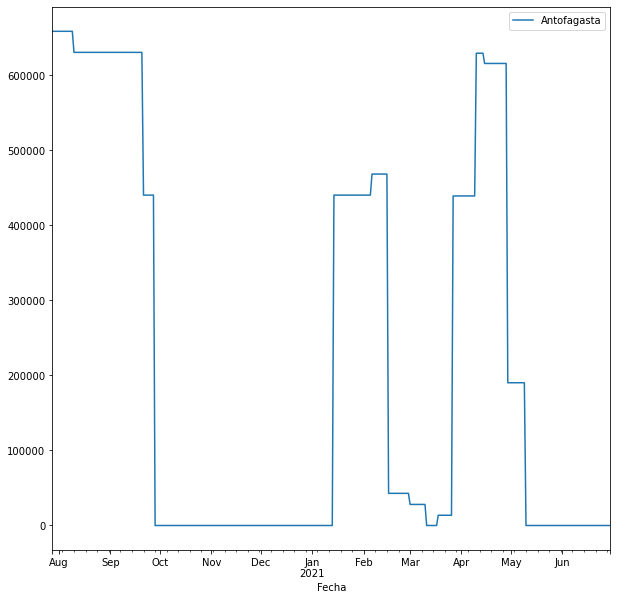

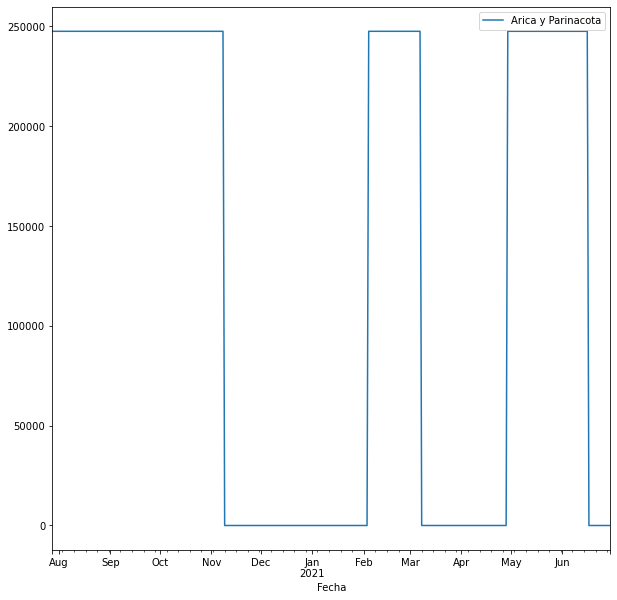

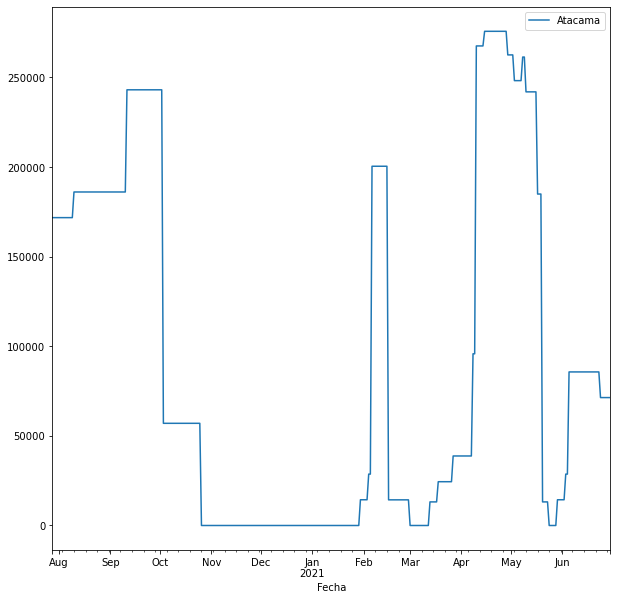

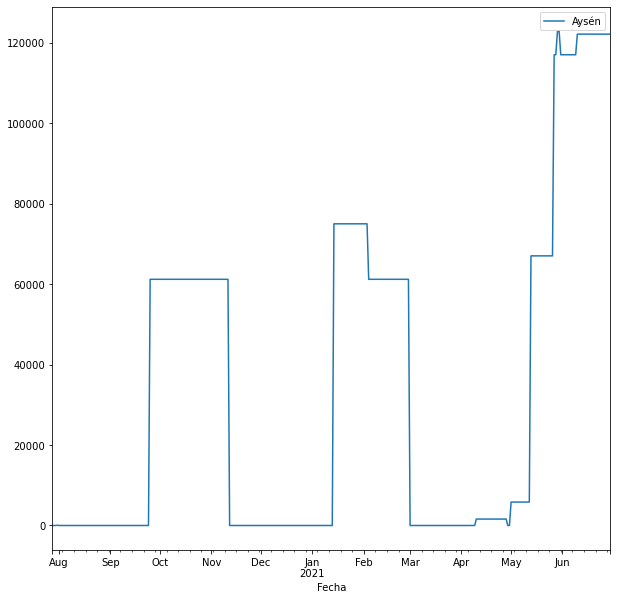

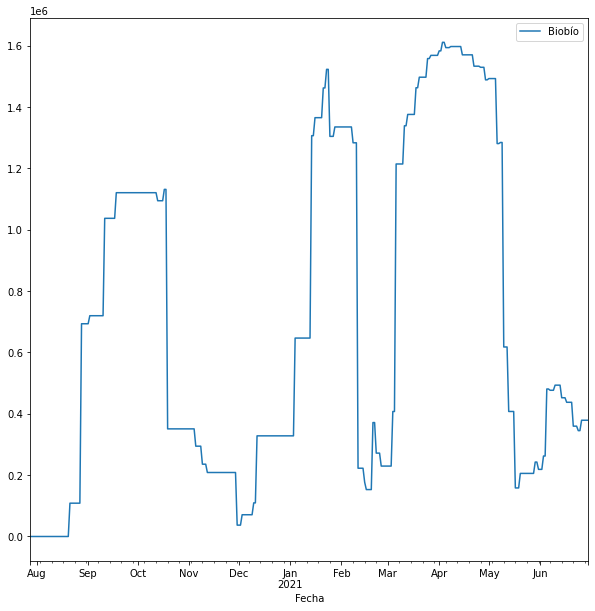

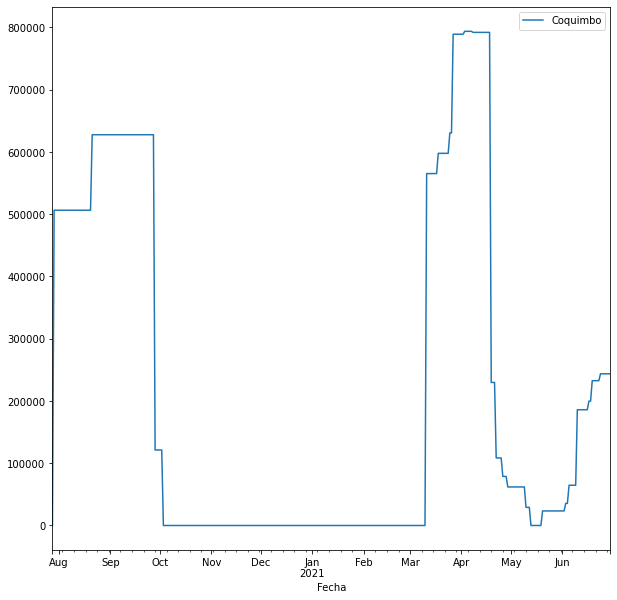

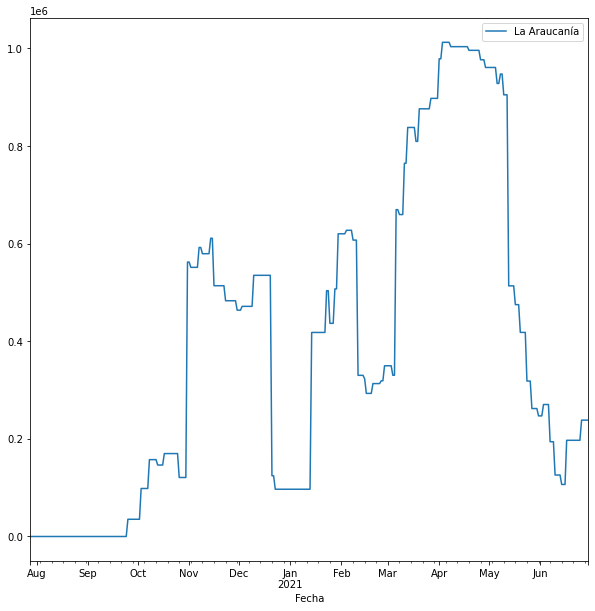

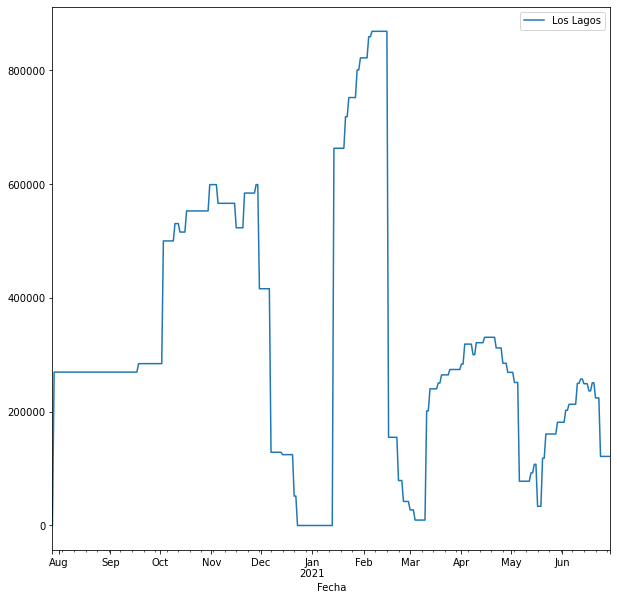

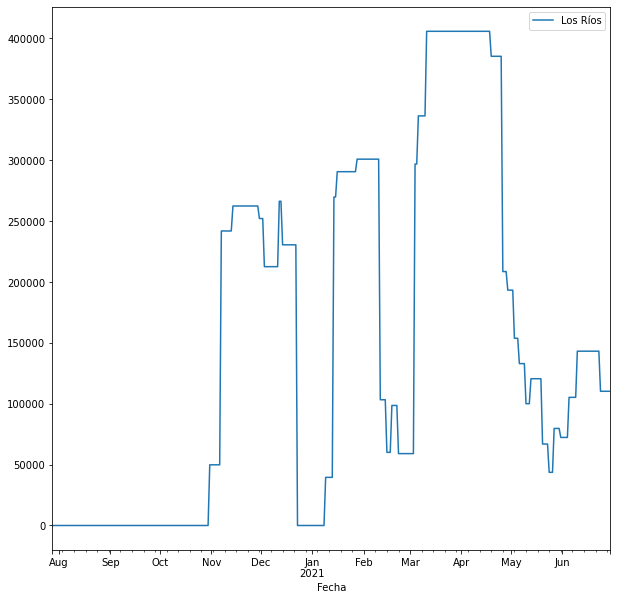

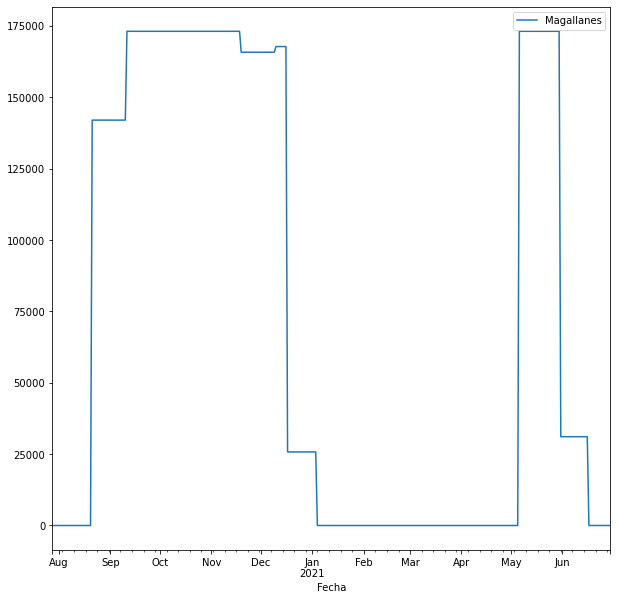

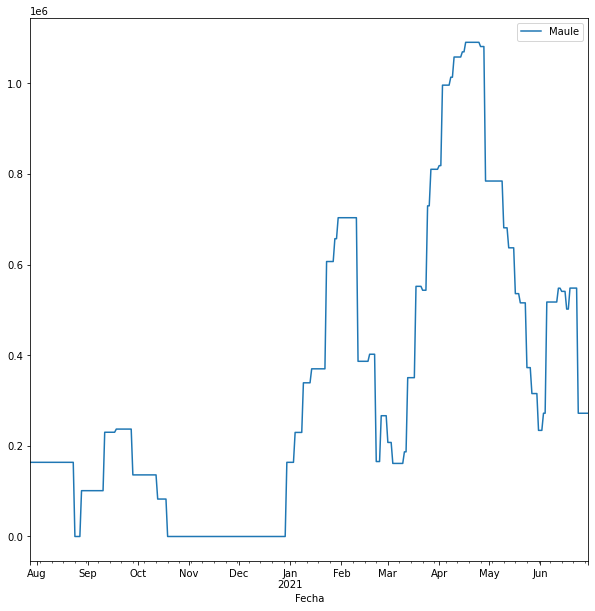

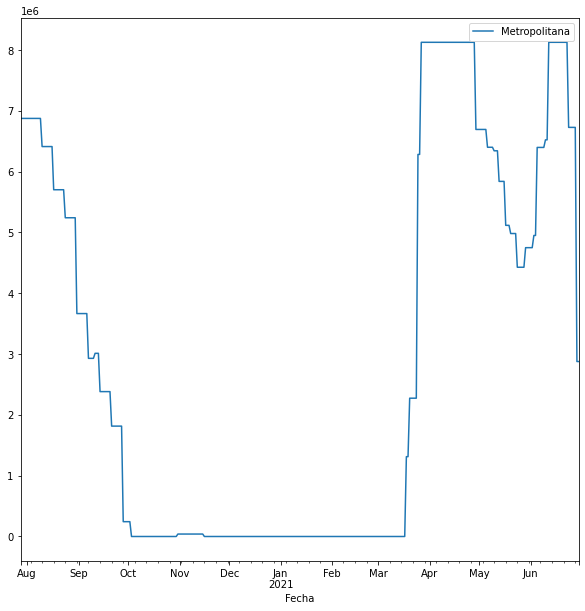

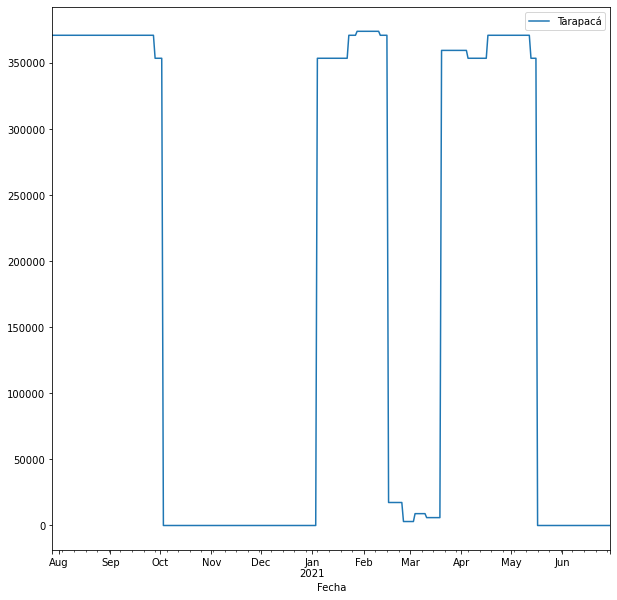

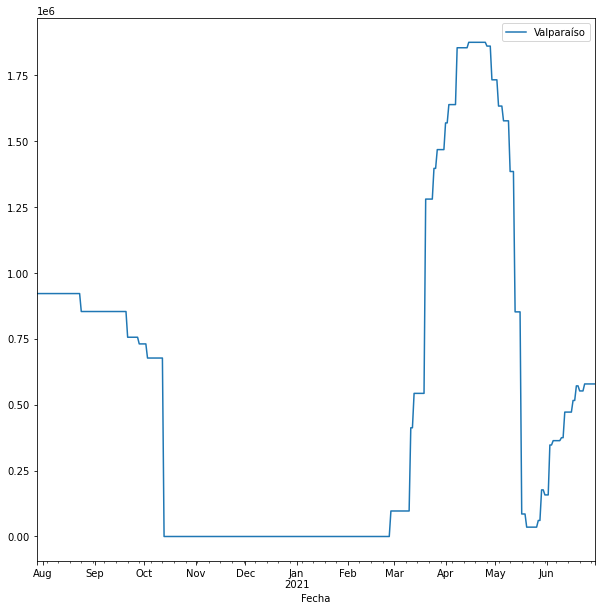

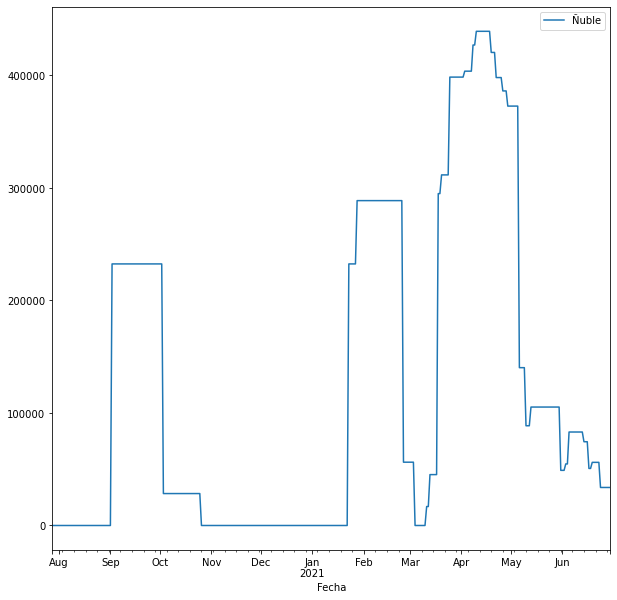

In [18]:
# En el siguiente cógido, se imprime un gráfico por región:
# donde el eje Y, es la cantidad de personas en cuarentena y el eje X representa la fecha.


ANTOF = AA.plot(x='Fecha', y='Antofagasta', kind="line",figsize=(10,10))
ARICA_Y_PARINACOTA = AA.plot(x='Fecha', y='Arica y Parinacota', kind="line",figsize=(10,10))
ATACAMA = AA.plot(x='Fecha', y='Atacama', kind="line",figsize=(10,10))
AYSEN = AA.plot(x='Fecha', y='Aysén', kind="line",figsize=(10,10))
BIOBIO = AA.plot(x='Fecha', y='Biobío', kind="line",figsize=(10,10))
COQUIMBO = AA.plot(x='Fecha', y='Coquimbo', kind="line",figsize=(10,10))
ARAUCANIA = AA.plot(x='Fecha', y='La Araucanía', kind="line",figsize=(10,10))
LOS_LAGOS = AA.plot(x='Fecha', y='Los Lagos', kind="line",figsize=(10,10))
LOS_RIOS = AA.plot(x='Fecha', y='Los Ríos', kind="line",figsize=(10,10))
MAGALLANES = AA.plot(x='Fecha', y='Magallanes', kind="line",figsize=(10,10))
MAULE = AA.plot(x='Fecha', y='Maule', kind="line",figsize=(10,10))
MATROPOLITANA = AA.plot(x='Fecha', y='Metropolitana', kind="line",figsize=(10,10))
TARAPACA = AA.plot(x='Fecha', y='Tarapacá', kind="line",figsize=(10,10))
VALPARAISO = AA.plot(x='Fecha', y='Valparaíso', kind="line",figsize=(10,10))
ÑUBLE = AA.plot(x='Fecha', y='Ñuble', kind="line",figsize=(10,10))


In [19]:
df

,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05,2020-08-06,...,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06,Poblacion
region_residencia,,,,,,,,,,,,,,,,,,,,,
Antofagasta,658916.0,658916.0,658916.0,658916.0,658916.0,658916.0,658916.0,658916.0,658916.0,658916.0,...,34,35,35,35,35,35,35,35,35,691854.0
Arica y Parinacota,247552.0,247552.0,247552.0,247552.0,247552.0,247552.0,247552.0,247552.0,247552.0,247552.0,...,13,13,13,13,13,13,13,13,13,252110.0
Atacama,171766.0,171766.0,171766.0,171766.0,171766.0,171766.0,171766.0,171766.0,171766.0,171766.0,...,35,34,34,34,34,34,34,34,34,314709.0
Aysén,0.0,0.0,0.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,...,62,61,61,61,56,56,56,56,56,175341.0
Biobío,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,128,126,126,126,126,126,126,126,125,1663696.0
Coquimbo,0.0,506391.0,506391.0,506391.0,506391.0,506391.0,506391.0,506391.0,506391.0,506391.0,...,60,59,59,59,59,59,59,59,59,836096.0
La Araucanía,0.0,0.0,0.0,132.0,0.0,0.0,0.0,0.0,0.0,0.0,...,130,130,130,130,131,131,131,131,130,1024393.0
Los Lagos,0.0,269398.0,269398.0,269398.0,269398.0,269398.0,269398.0,269398.0,269398.0,269398.0,...,116,116,116,116,117,117,117,117,118,891440.0
Los Ríos,0.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,...,47,47,47,47,47,47,47,47,47,405835.0


In [20]:
df.loc['Total']= df.sum()
df

# Aqui se usa el código anterior para obtener el total de personas en cuarentena para todo el pais, sumando todas las regiones.

,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05,2020-08-06,...,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06,Poblacion
region_residencia,,,,,,,,,,,,,,,,,,,,,
Antofagasta,658916.0,658916.0,658916.0,658916.0,658916.0,658916.0,658916.0,658916.0,658916.0,658916.0,...,34.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,691854.0
Arica y Parinacota,247552.0,247552.0,247552.0,247552.0,247552.0,247552.0,247552.0,247552.0,247552.0,247552.0,...,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,252110.0
Atacama,171766.0,171766.0,171766.0,171766.0,171766.0,171766.0,171766.0,171766.0,171766.0,171766.0,...,35.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,314709.0
Aysén,0.0,0.0,0.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,...,62.0,61.0,61.0,61.0,56.0,56.0,56.0,56.0,56.0,175341.0
Biobío,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,128.0,126.0,126.0,126.0,126.0,126.0,126.0,126.0,125.0,1663696.0
Coquimbo,0.0,506391.0,506391.0,506391.0,506391.0,506391.0,506391.0,506391.0,506391.0,506391.0,...,60.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,836096.0
La Araucanía,0.0,0.0,0.0,132.0,0.0,0.0,0.0,0.0,0.0,0.0,...,130.0,130.0,130.0,130.0,131.0,131.0,131.0,131.0,130.0,1024393.0
Los Lagos,0.0,269398.0,269398.0,269398.0,269398.0,269398.0,269398.0,269398.0,269398.0,269398.0,...,116.0,116.0,116.0,116.0,117.0,117.0,117.0,117.0,118.0,891440.0
Los Ríos,0.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,...,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,405835.0


In [21]:
CHILE_T = df.transpose()
CHILE_T = CHILE_T.iloc[0:338] 

# Se hace la traspuesta de la matriz anterior, para facilitar la elaboración del gráfico, y se utilizan 338 datos (ya que las otras fechas tienen el dato de fase por comuna, no de habitantes en cuarentena.)

In [22]:
CHILE_T.reset_index(level=0, inplace=True)
# Se resetea el indice para crear una columna que contenga las fechas correspondientes.

In [23]:
CHILE_T = CHILE_T.rename(columns={'index':'Fecha'})

# Se cambia el nombre de la columna 'index' a 'Fecha' para mayor claridad básicamente.

In [24]:
CHILE_T['Fecha'] = pd.to_datetime(CHILE_T['Fecha'], errors = 'coerce')

# Aquí se pasa el formato de la columna 'Fecha' a un formato de fecha Año/Mes/Dia, ya que antes era de tipo object.

In [25]:
CHILE_T

# Se obtiene la siguiente data, con los códigos anteriores.

region_residencia,Fecha,Antofagasta,Arica y Parinacota,Atacama,Aysén,Biobío,Coquimbo,La Araucanía,Los Lagos,Los Ríos,Magallanes,Maule,Metropolitana,O’Higgins,Tarapacá,Valparaíso,Ñuble,Total
0,2020-07-28,658916.0,247552.0,171766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,163626.0,6873706.0,425338.0,370857.0,921680.0,0.0,9833441.0
1,2020-07-29,658916.0,247552.0,171766.0,0.0,0.0,506391.0,0.0,269398.0,0.0,0.0,163626.0,6873706.0,425338.0,370857.0,921680.0,0.0,10609230.0
2,2020-07-30,658916.0,247552.0,171766.0,0.0,0.0,506391.0,0.0,269398.0,0.0,0.0,163626.0,6873706.0,425338.0,370857.0,921680.0,0.0,10609230.0
3,2020-07-31,658916.0,247552.0,171766.0,64.0,0.0,506391.0,132.0,269398.0,48.0,0.0,163626.0,6873706.0,425338.0,370857.0,921680.0,0.0,10609474.0
4,2020-08-01,658916.0,247552.0,171766.0,0.0,0.0,506391.0,0.0,269398.0,0.0,0.0,163626.0,6873706.0,425338.0,370857.0,921680.0,0.0,10609230.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,2021-06-26,0.0,0.0,71367.0,122163.0,378960.0,243645.0,238313.0,121334.0,110220.0,0.0,271913.0,6726305.0,554207.0,0.0,578779.0,33789.0,9450995.0
334,2021-06-27,0.0,0.0,71367.0,122163.0,378960.0,243645.0,238313.0,121334.0,110220.0,0.0,271913.0,6726305.0,554207.0,0.0,578779.0,33789.0,9450995.0
335,2021-06-28,0.0,0.0,71367.0,122163.0,378960.0,243645.0,238313.0,121334.0,110220.0,0.0,271913.0,6726305.0,554207.0,0.0,578779.0,33789.0,9450995.0
336,2021-06-29,0.0,0.0,71367.0,122163.0,378960.0,243645.0,238313.0,121334.0,110220.0,0.0,271913.0,2876647.0,540044.0,0.0,578779.0,33789.0,5587174.0


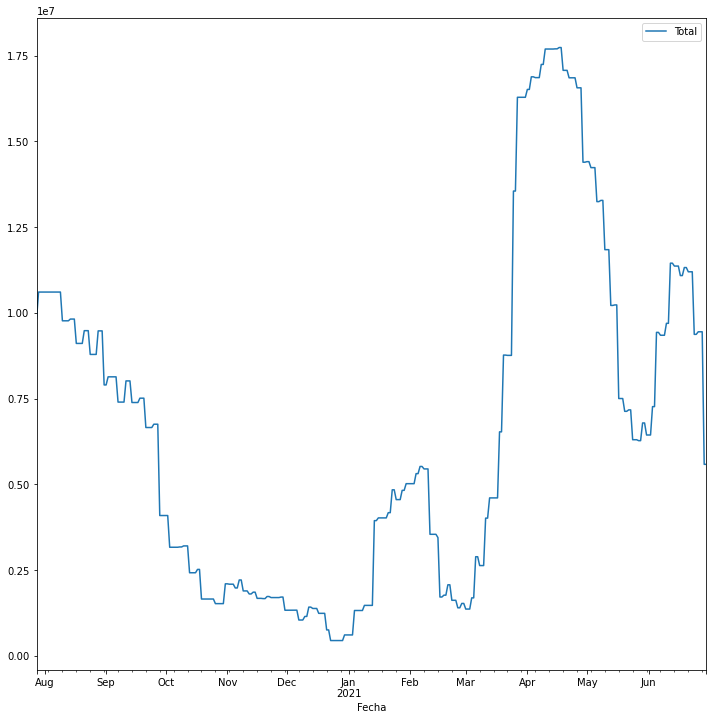

In [26]:
CHILE = CHILE_T.plot(x='Fecha', y='Total', kind="line",figsize=(12,12))

# Gráfico final con la poblacion el cuarentena por cada mes, dia.

# Se puede ver que a mediados de abril de 2021 fue el peak de la pandemia en Chile.

# El eje X representa el period desde Agosto 2020 a Junio 2021, y el eje Y representa la población en cuarentena 

# La medida del eje Y esta en Decenas de Millón (debe multiplicarse por 10.000.000 para obtener el número real de población en cuarentena)